# Fake News Dectetion with DeepLearning

## Introdução

Num mundo onde cada vez mais tem fluxo de informação, cada vez mais tem-se visto a necessidade de averiguar se uma informação é falsa ou verdadeira.  Pessoas que lidam com jornalismo no seu dia a dia e até mesmo pessoas minimamente informadas conseguem detectar com relativa facilidade uma fake news, contudo em agluns casos nem mesmo esse tipo de pessoa consegue detectar fazendo com que o falso seja entendido como verdadeiro. Se até mesmo especialista e pessoas informada tem dificuldaes para determinar se uma informação é falsa ou verdadeira havemos de convir que muito meno a opnião publica no geral, e justamente por isso uma fake news pode ter efeitos tão destrutivos na sociedade, pois mentir e fazer as pessoas acreditar numa informação é muito mais fácil do que desmenti-la, desmentir uma informação falsa requer muito mais esforço do que  espalhar uma e quanto maior for o tempo que  se elva para fazer isso mais difícil será comcertar os estragos causados pela noticias falsas..

Pensando nisso, várias entidades jornalísticas vem empenhando esforços para detectar e desmentir fake new, um procedimento normalmente realizado por um especialista na área. O grande problema é que por questões de escalabilidade não é possivel que um espeecialista avalie uma grande quantidade de fake news e o procedimento de avaliação  de uma notícia e a publicação de sua validade requer um tempo considerável ao ser feita por um ser humano, sendo que um noticia falsa muitas das vezes é divulgada por robôs de disparo em massa. Sendo assim é necessário haver uma solução que tanto possa avaliar se uma notícia é falsa ou verdadeira como também o pssa fazer de forma o mais rápida possivel e de forma automatizada.

Justamente considerando-se essa demanda cogitou-se realizar este projeto, aonde iremos propor uma solução que envolve processamento de linguagem natural e DeepLearning para avaliar se uma otícia é falsa ou verdadeira.

Como um primeiro MVP deste projeto pensou-se  em criar um modelo de Deep Learning que a partir do banco de dados da Uniersity of Victoria( Universidade de tecnologia do Canadá)  se pudesse prever se um noticia era falsa ou verdadeira.

O Daset utilizado possui as seguintes caracterpisticas:

- title : título da notícia
- text : Conteúdo textual da notícia
- date : data em que a notícia foi publicada
- subject : tema abordado pela notícia

Esse dataset fora extraído da seguinte forma:

 - As notícias verdadeiras foram extraidas de artigo do site reuters.com, um site de notícias mundial cuja informação é confiável 
 - As notícias falsas foram extraídas dos mais diversas fontes e de artigos aos quais não são confiáveis.
 - Todos os artigos extraídos foram coletados entre os anos de 2016 e 2017
 - Erros textuais e gramaticais foram mantidos nas fake news, preservando seu formato original

O dataset não explíccita o label das notícias por meio de uma varável, contudo ele é constituido de dois  arquivos csv rotulados (`true.csv`, `fake.csv`), onde posteriormente criamos os labels para cada um desse arquivos e  depois os concatenando e embaralhando os dados.

Mais informações e detalhes sobre o dateset utilizdo neste projeto pode ser enontrado no link abaixo:

[Fake_News_Dataset_ReadMe](https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/02/ISOT_Fake_News_Dataset_ReadMe.pdf)

 O link para acesso e download do dataset pode ser encontrado no próprio site da Unniversity of Victoria:

[fake-news-detection-datasets](https://onlineacademiccommunity.uvic.ca/isot/2022/11/27/fake-news-detection-datasets/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
#Setup proejct

from Environment.PathsParameters import *
from Environment.Parameters import *
from Utils.ProjectPathsSetup import ProjectPathsSetup
ProjectPathsSetup().add_project_paths('./')

In [4]:
from Utils.ProjectPathsSetup import ProjectPathsSetup
from Utils.JSONHandler import JSONHandler
ProjectPathsSetup().add_project_paths('./')

jsonHandler = JSONHandler()


## Pré Avaliação e entendimento dos Datasets de notícias

Primeiramente como mencionado carregaemos os banco de dados e daremos os devidos labels a cada tipo de notícia, 0 para true e 1 para fake news:

In [5]:
#load Data

fake_news_df = pd.read_csv(FAKE_NEWS_DATASET)
fake_news_df['label'] = 1
true_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df['label'] = 0


In [6]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [7]:
true_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


Aparentemente  não se possui valores nulos ou indevidos e o dataset só precisa de uma transformação na coluna 'date' apena para passa-la para o formato datetime. Contudo ao olhar mais atentamente percebe-se que existem linhas com valores inaqdequados

In [8]:
fake_news_df[ fake_news_df['date'].str.startswith('http') ] 

,title,text,subject,date,label
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,1
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1


Devemos então  descartar essas linhas para conseguir fazer a devida conversão:

In [9]:
fake_news_df['date'] = pd.to_datetime(fake_news_df['date'], errors='coerce')
fake_news_df = fake_news_df.dropna(subset=['date'])

In [10]:
fake_news_df['date'] = pd.to_datetime(fake_news_df['date'].values)
fake_news_df['month'] = fake_news_df['date'].apply(lambda x: x.month)
fake_news_df['year'] = fake_news_df['date'].apply(lambda x: x.year)

In [26]:
true_news_df['date'] = pd.to_datetime(true_news_df['date'])
true_news_df['month'] = true_news_df['date'].apply(lambda x: x.month)
true_news_df['year'] = true_news_df['date'].apply(lambda x: x.year)

In [11]:
fake_news_df['date']

0       2017-12-31
1       2017-12-31
2       2017-12-30
3       2017-12-29
4       2017-12-25
           ...    
23476   2016-01-16
23477   2016-01-16
23478   2016-01-15
23479   2016-01-14
23480   2016-01-12
Name: date, Length: 23471, dtype: datetime64[ns]

In [27]:
true_news_df['date']

0       2017-12-31
1       2017-12-29
2       2017-12-31
3       2017-12-30
4       2017-12-29
           ...    
21412   2017-08-22
21413   2017-08-22
21414   2017-08-22
21415   2017-08-22
21416   2017-08-22
Name: date, Length: 21417, dtype: datetime64[ns]

In [12]:
true_news_df[ true_news_df['date'].str.startswith('http') ] 

,title,text,subject,date,label


Feito isso podemos analisar nosso banco de dados em função do tempo e ver se possa existir alguma relação entre divulgação de fake news e determinadas datas.

### Análise previa Notócias, um coparativo entre fake e true News

#### Quantidade longo do tempo

 A seguir vamos avaliar a quantidade de noticias falsas  e verdadeira publicadas por mes e ano:

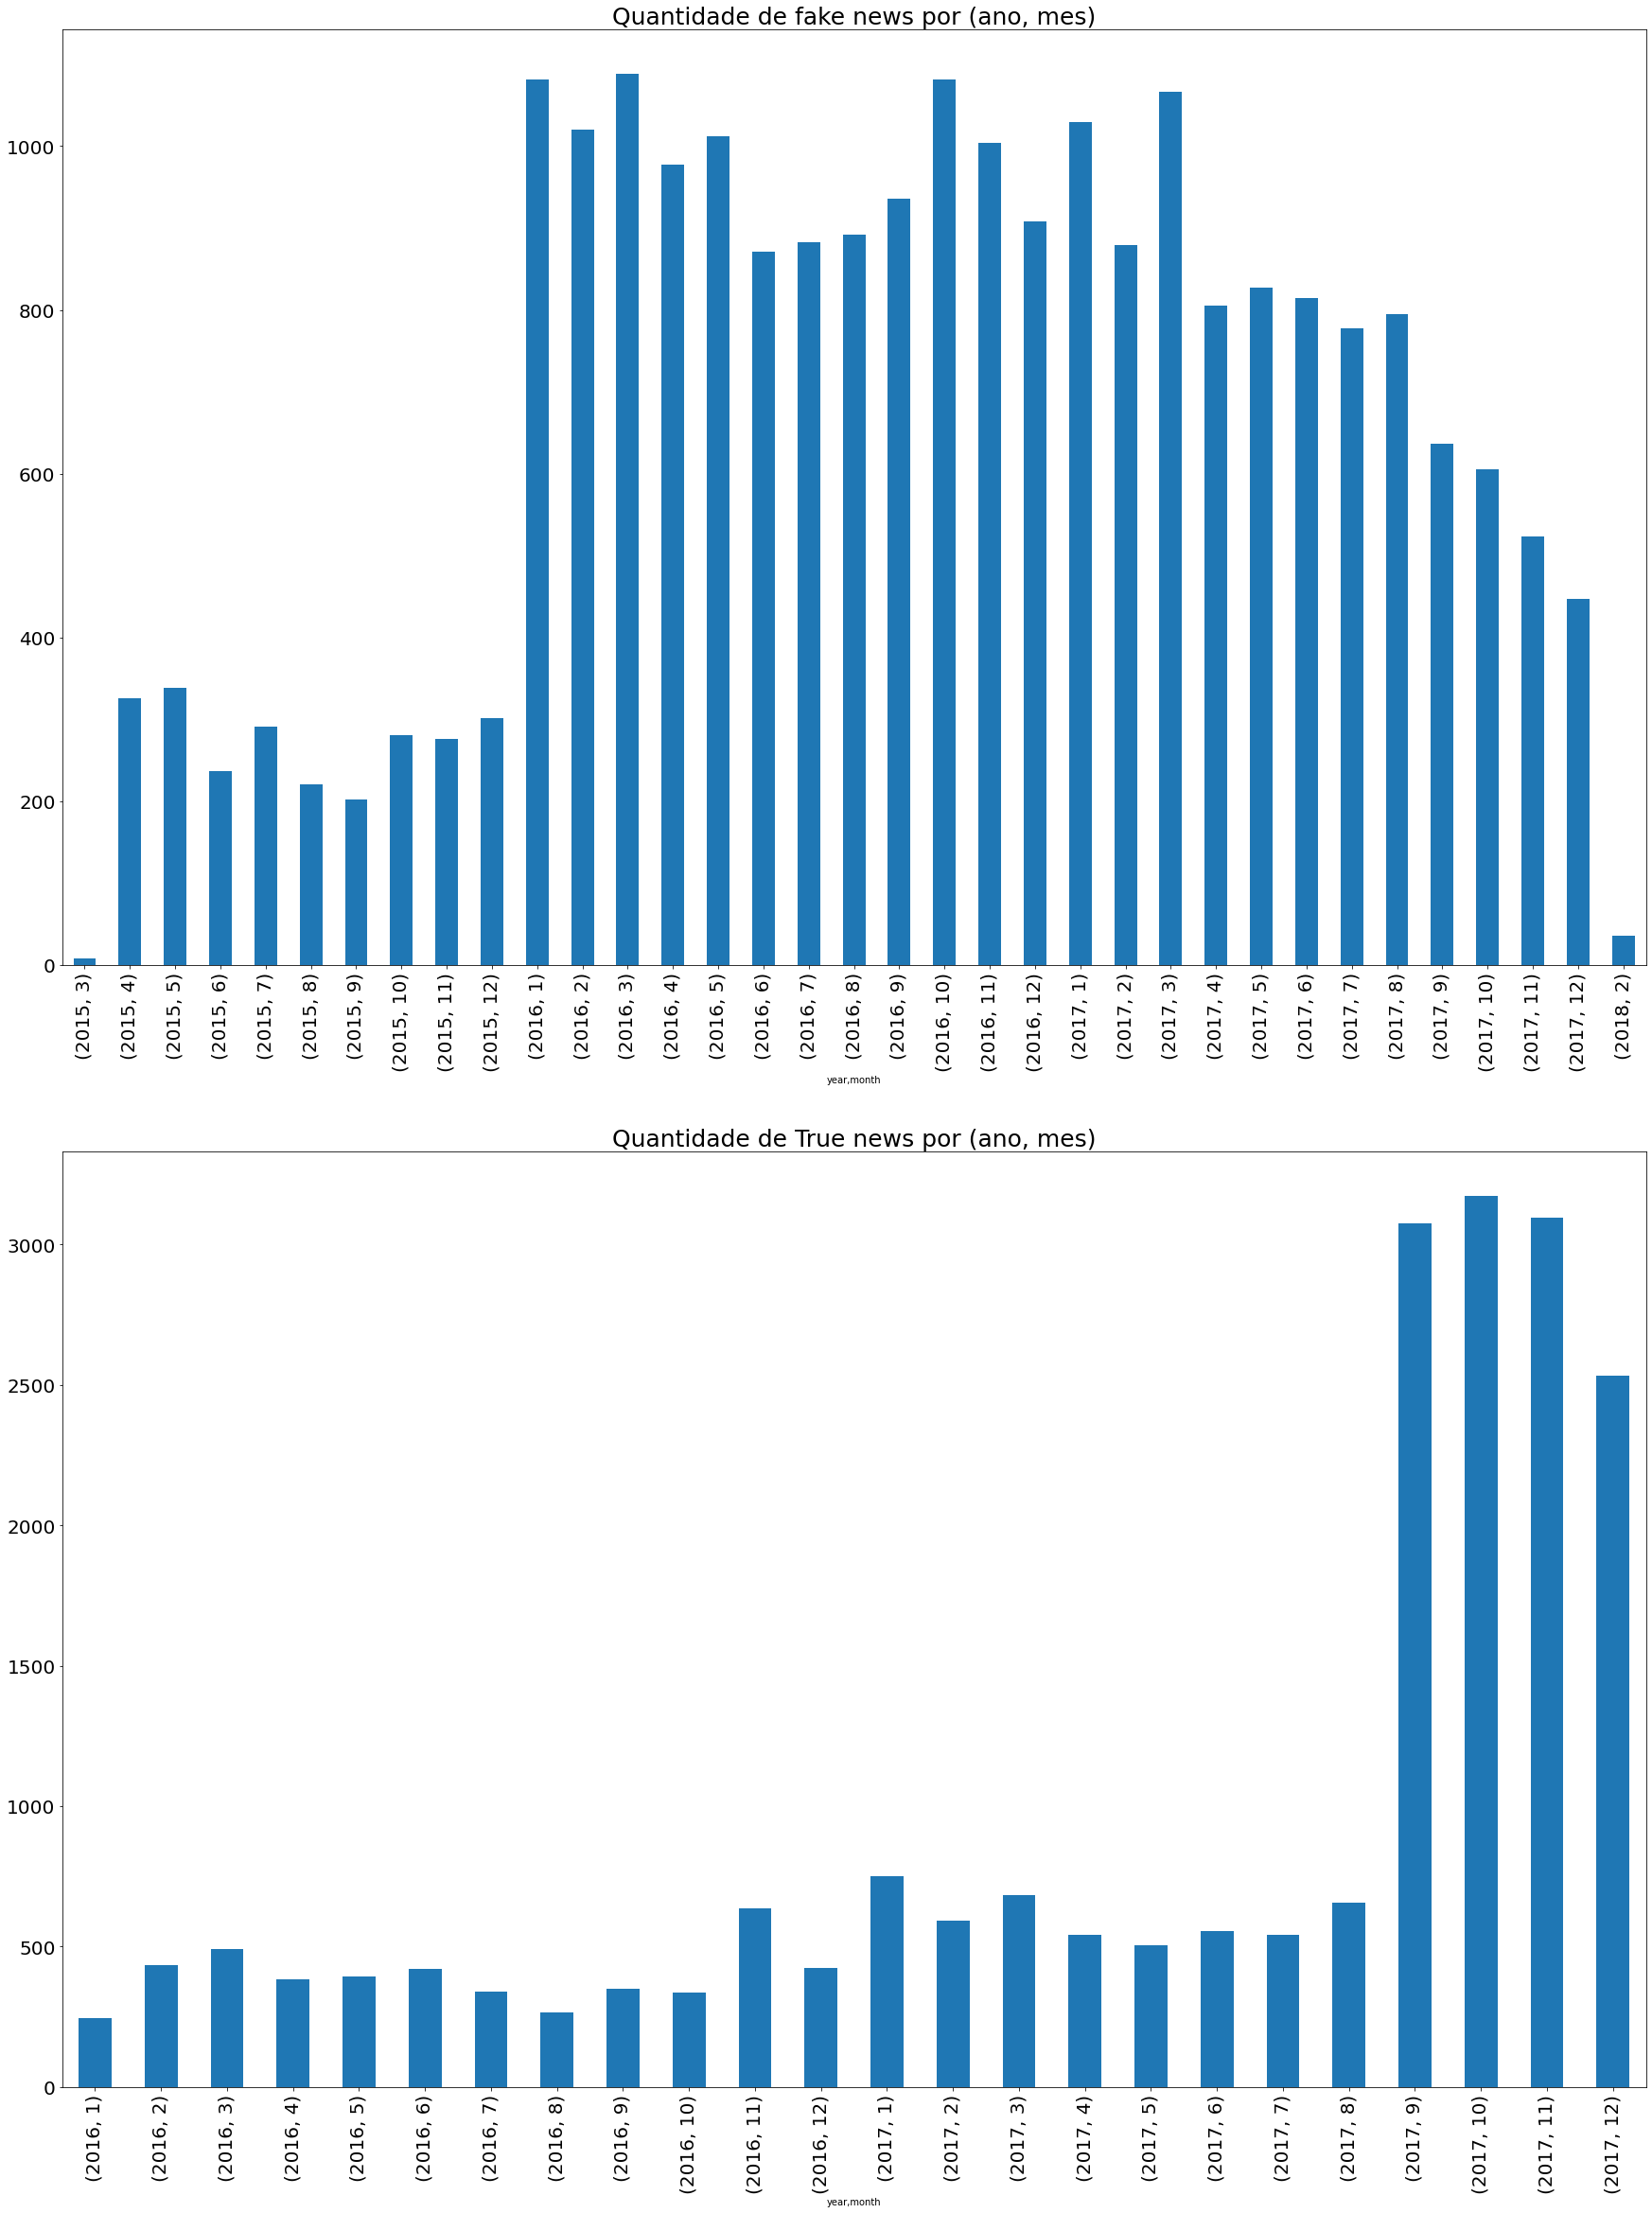

In [41]:
fig,axs = plt.subplots(2,1, figsize=(30,40))
fig.set_facecolor('white')
fake_news_df.groupby(by=['year', 'month'], axis=0).count()['title'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Quantidade de fake news por (ano, mes)', fontsize= 25)
axs[0].tick_params(axis='both', which='major', labelsize=20)


true_news_df.groupby(by=['year', 'month'], axis=0).count()['title'].plot(kind='bar', ax=axs[1])
axs[1].set_title('Quantidade de True news por (ano, mes)', fontsize= 25)
axs[1].tick_params(axis='both', which='major', labelsize=20)



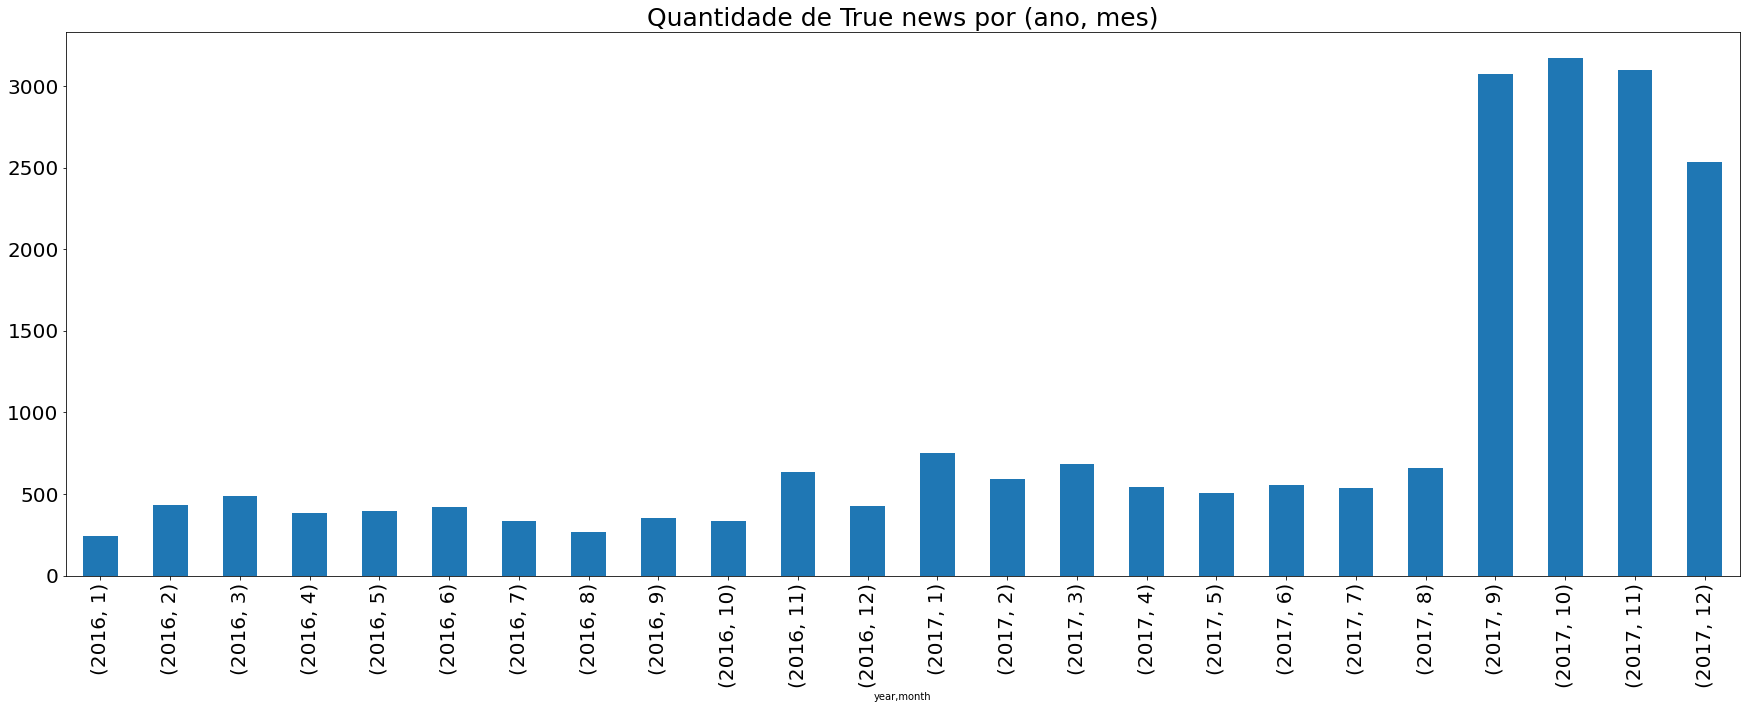

Observando o gráfico acima percebe-se que não dá para estabelecer uma relação direta entre quantidade de fake/true news e  tempo. Tanto uma quanto outra estam diretamente associados a evento e contextos ao quais foram divulgadas, esse dois fatores são coisa não previsíveis, ou seja, podem variar em qualquer momento do tempo e portanto não estão correlacionados com ele. Sendo assim decidiu-se não se considerar  a data de divulgação de uma notícia para ser prever se ela é ou não fake.

#### Temas Relacionado a fake news

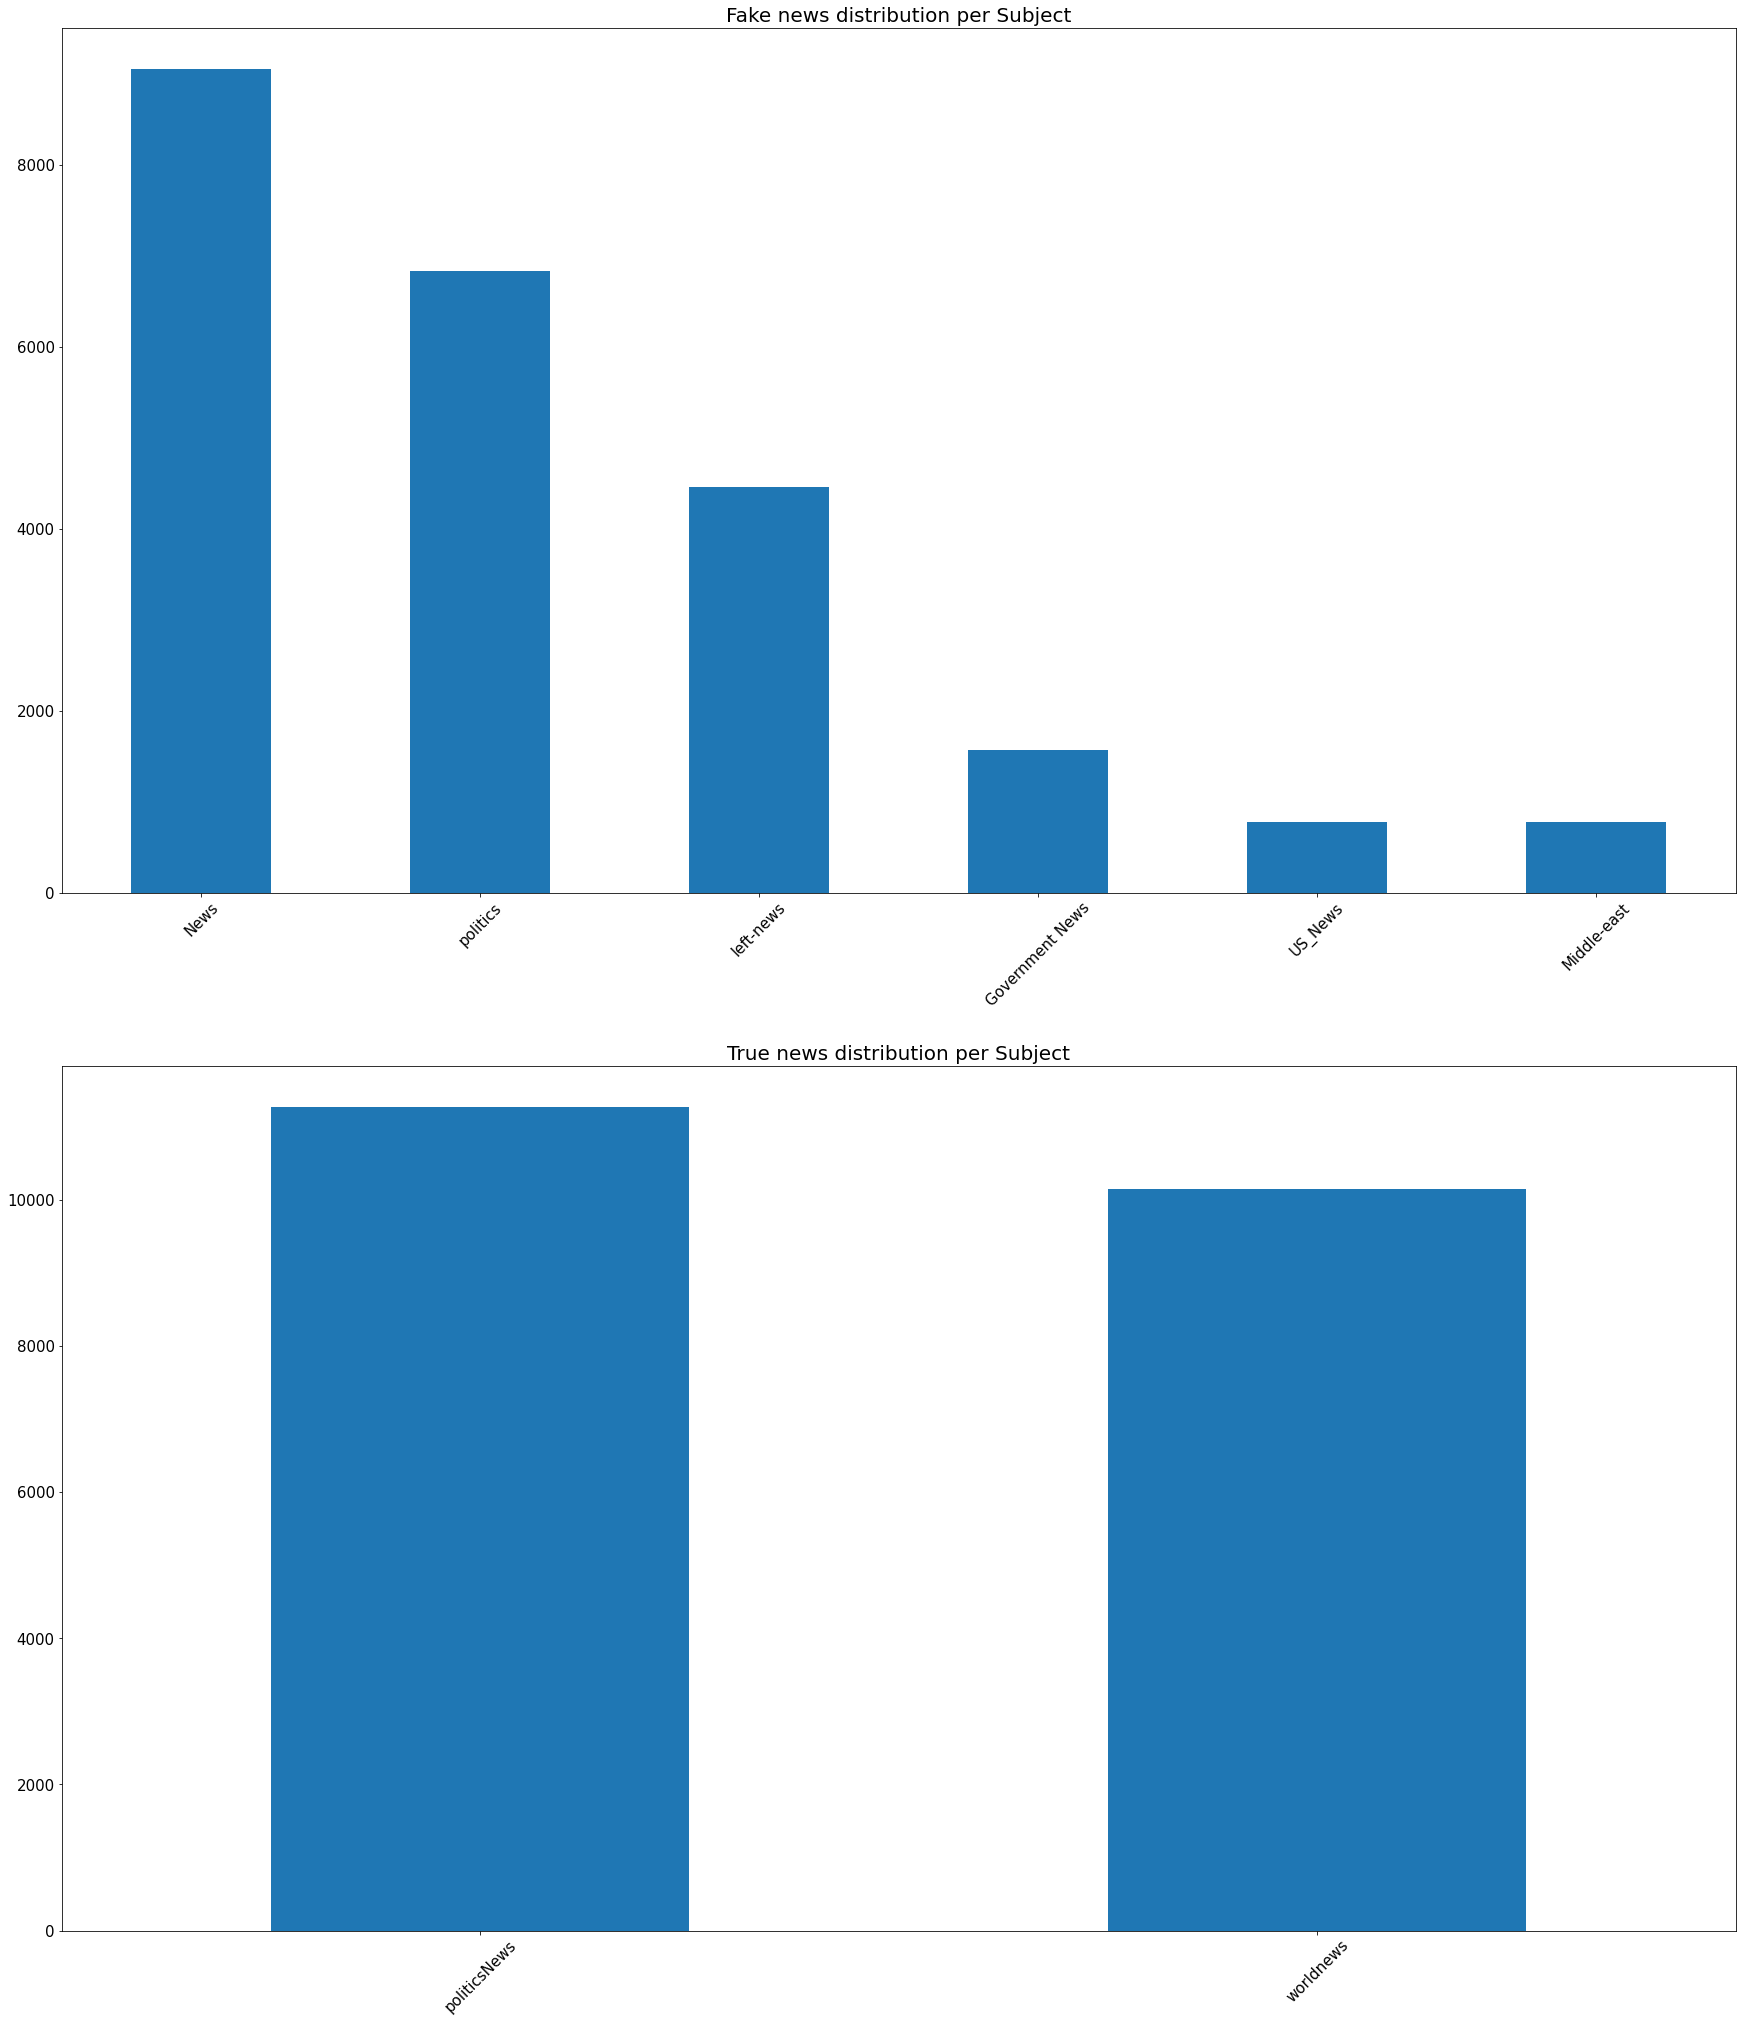

In [47]:
fig,axs = plt.subplots(2,1, figsize=(30,35))
fig.set_facecolor('white')
fake_news_df['subject'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Fake news distribution per Subject', fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].tick_params(axis='x', which='major', rotation=45)

true_news_count= true_news_df['subject'].value_counts()
true_news_count.plot(kind='bar', ax=axs[1])
axs[1].set_title('True news distribution per Subject', fontsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='x', which='major', rotation=45)

Ao se avaliar os temas, percebe-se que tanto as fake quanto as true news se concentram temas como a notícias gerais ou notícias que cujo tema giram em torno de política. As fake news são mais diversas e abordam mais temas, contudo eles pouco são representativos comparado aos dois temas principais. Sendo assim, constata-se que o tema  não diferencia uma notícia false de uma verdadeira. Portanto não iremos considerar-lo nas etapas posteriores.

#### Jutando os dados 

Através da análise preliminar do banco de  dados, constatou-se que somente os títulos e o texto da notícia eram relavante na sua classificação. Sendo assim consolidamos aqui os dados de interesse para então passar a etapa de preprocessamento.  E assim fez-se pela classe `Concatenator`, que não apenas  concatena as fake e true news num unico dataframe, mas também embaralha esses dados. O embaralhamento foi pensado justamente para garantir a variabilidade do banco de dados e assim garantir uma melhor apredizado de modelos na etapa de modelagem.

In [14]:
from Utils.Concatenator import Cocatenator

In [65]:
fake_news_df = pd.read_csv(FAKE_NEWS_DATASET)
fake_news_df['date'] = pd.to_datetime(fake_news_df['date'], errors='coerce')
fake_news_df = fake_news_df.dropna(subset=['date'])
fake_news_df['label'] = 1

true_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df['label'] = 0

news_df = Cocatenator().concatenate(fake_news_df, true_news_df)
news_df = news_df[['title','text','label']]
#build news data
news_df['news']  = news_df[['title', 'text']].apply(lambda row: row['title'] + ' '  + row['text'], axis = 1) #joint title with text
news_df.to_csv(DATASET_PATH  + 'news.csv', sep=',')

In [66]:
len(news_df)

44888

## Data Preprocessing

O preprecessamento de dados basicamente foi realizado considerando 2 etapas. A etapa de processamento de texto, e a etapa de codificação do texto em uma forma de vetor numérico.
Para etapa de  processamento de texto fizemoso processamento de texto que usualmente se faz dados de texto: 

- Remoção de caracteres especiais
- Tokenização
- Eliminação das "stopwords"
- Steamming (normalização dos tokens)

Feito isso, utilizamos os tokens normalizados para realizar  as codificações mediante a ténicas de 'feature extraction', que basicamente consiste em transforma uma palavra em vetor considerando o contexto ao qual ela está inserido. Basicamente foram dois tipos:

- embedding doc
- word2vector

E assim se fez respectivamente para os títutlos das notícias e os textos

Devido ao fato dos dados a serem processados requerem um tempo de processamento significativo, decidiu-se separar o preprocessamento através dos scripts `transform_text_to_embeddingDoc.py` e `transform_text_to_w2v.py` presentes no módulo *"PreProcessing". Os scripts fazem todo o préprocessamento necessário aos dados e os salvam em arquivos .csv, aos quais usaremos para dar processeguimento a construção de modelos.

O logs desses script podem ser vistos abaixo:

In [16]:
with open(LOGS_PATH + 'preprocessing_data_to_embedding_doc.txt', 'r') as f:
    logs_emb_doc = f.read()

print(logs_emb_doc)

2023-07-02 06:27:31.820688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-07-02 06:27:31.820909: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Inicializing Preprocessing setup...
Download 'punkt' NLTK package

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Download nltk 'stopwords' package

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
Setup  done!

*********************************************************************************

## Modelagem

In [9]:

from IPython.display import Image, display

#### With embedding doc

##### EmbeddingLTSM

In [14]:
def display_img(file_name):
    emb_doc_embeddingLSTM_img = Image(TRAIN_HIST_ASSET_PATH + '/' + file_name)
    display(emb_doc_embeddingLSTM_img)
    

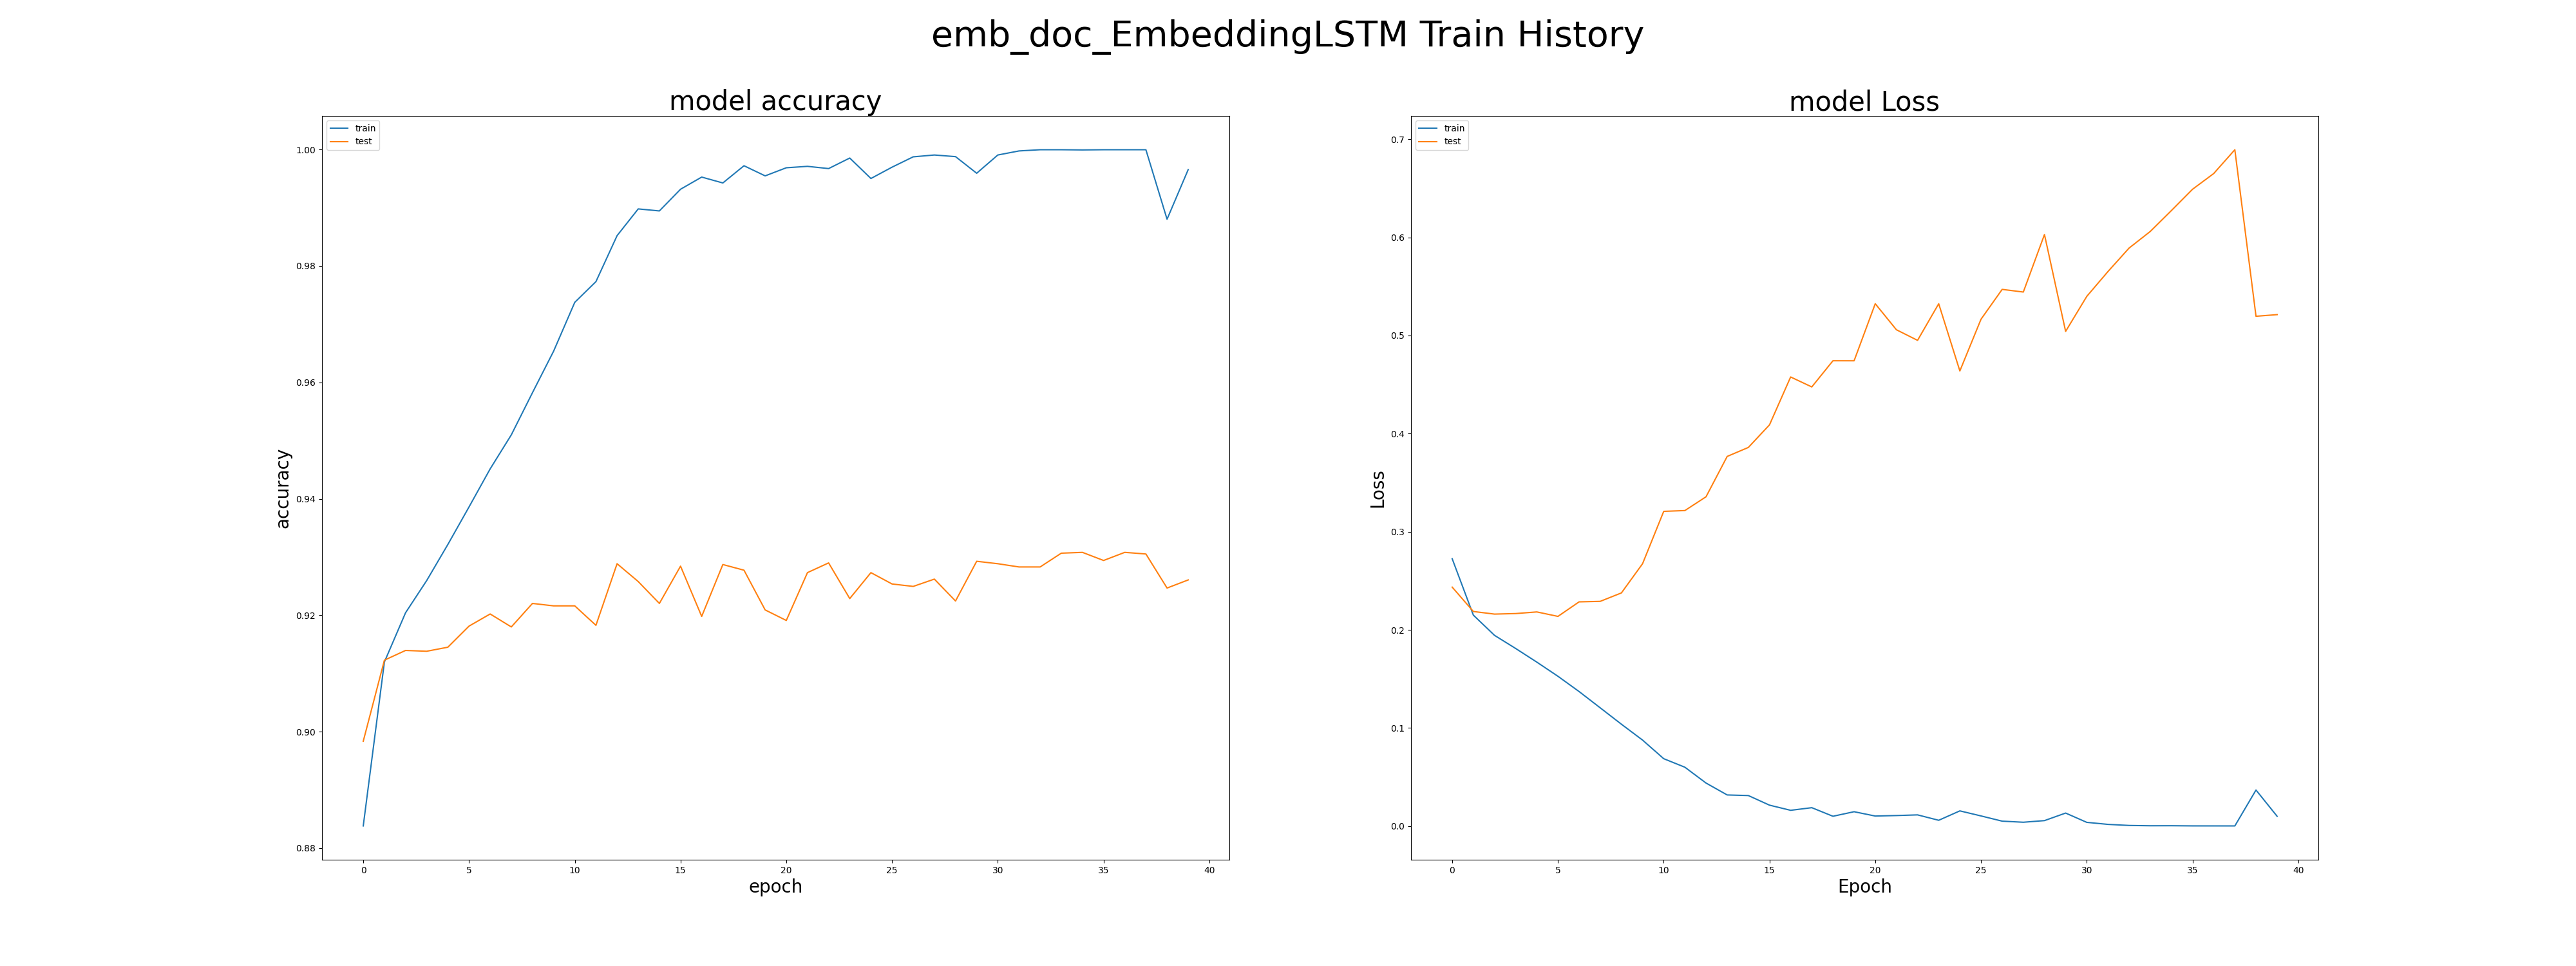

In [15]:
#print train history
display_img('emb_doc_EmbeddingLSTM.png')

##### Simple Dense

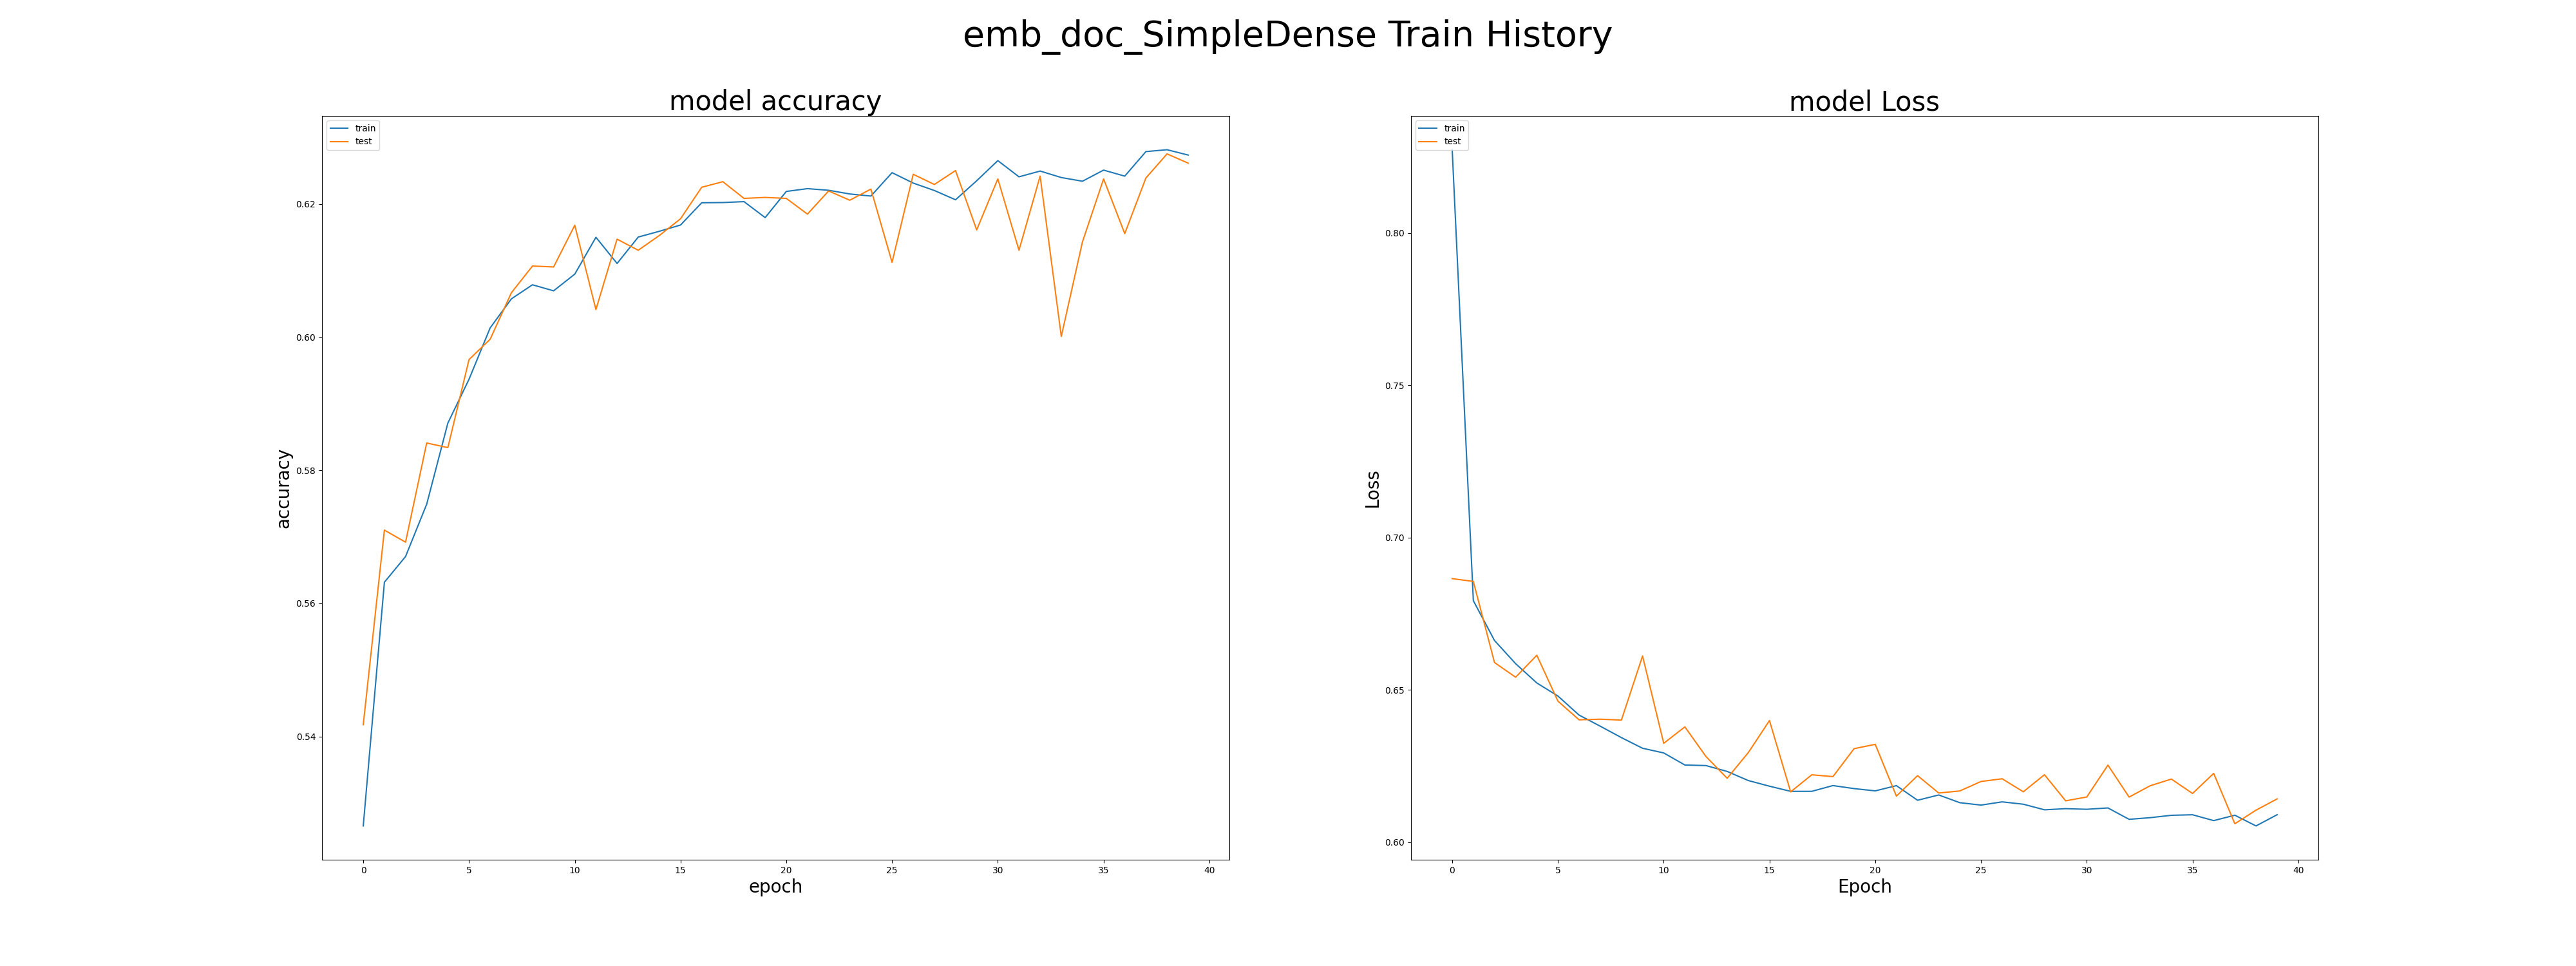

In [16]:
#print train history
display_img('emb_doc_SimpleDense.png')

#### TCN

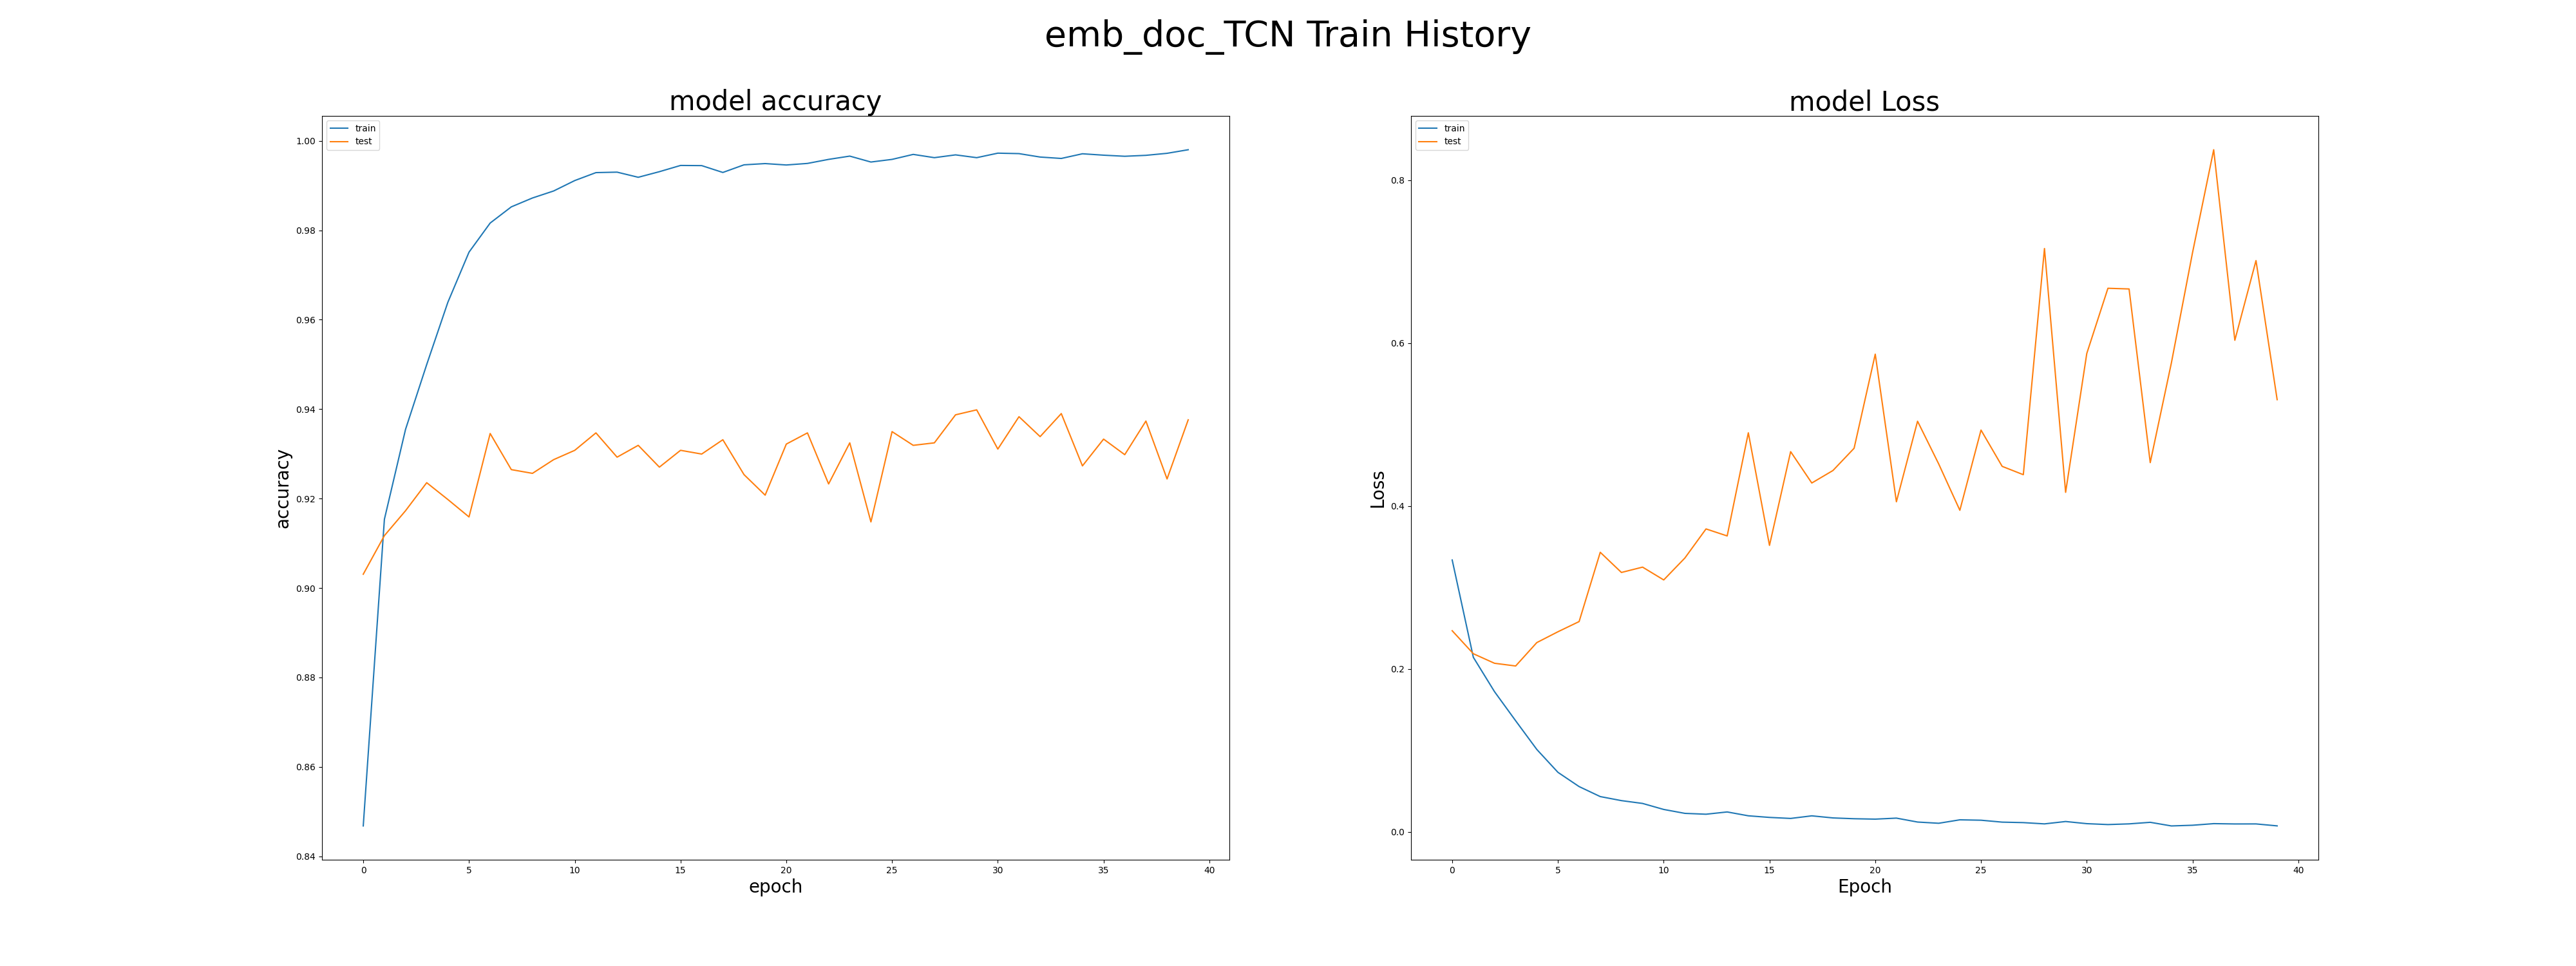

In [17]:
#print train history
display_img('emb_doc_TCN.png')

##### CNN1D

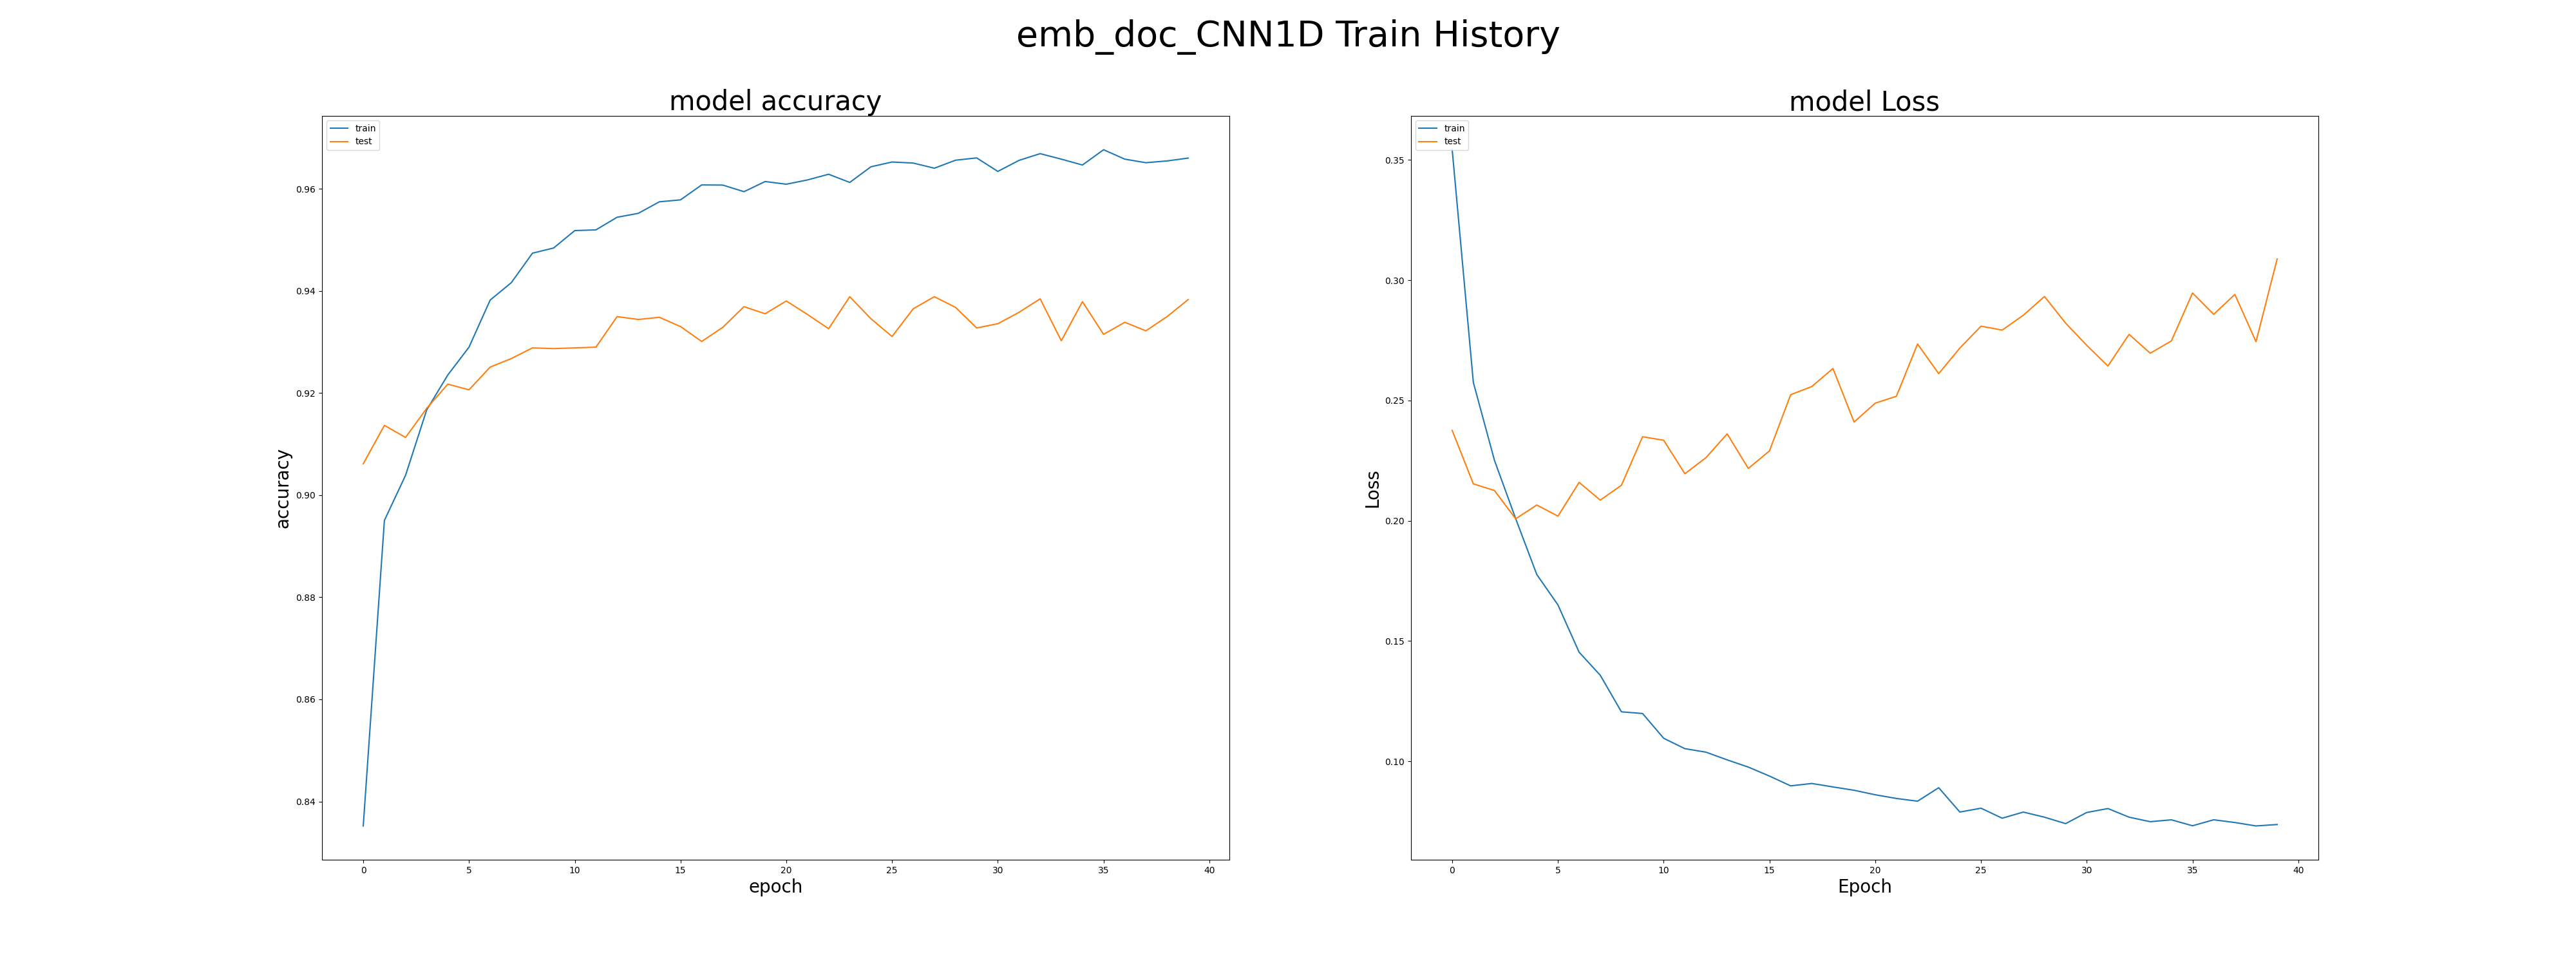

In [19]:
#print train history
display_img('emb_doc_CNN1D.png')

##### CNNBiGRU

In [41]:
#print train history
display_img('emb_doc_EnsembleCNN.png')

### Vectorizer codification

##### VEmbeddingLSTM

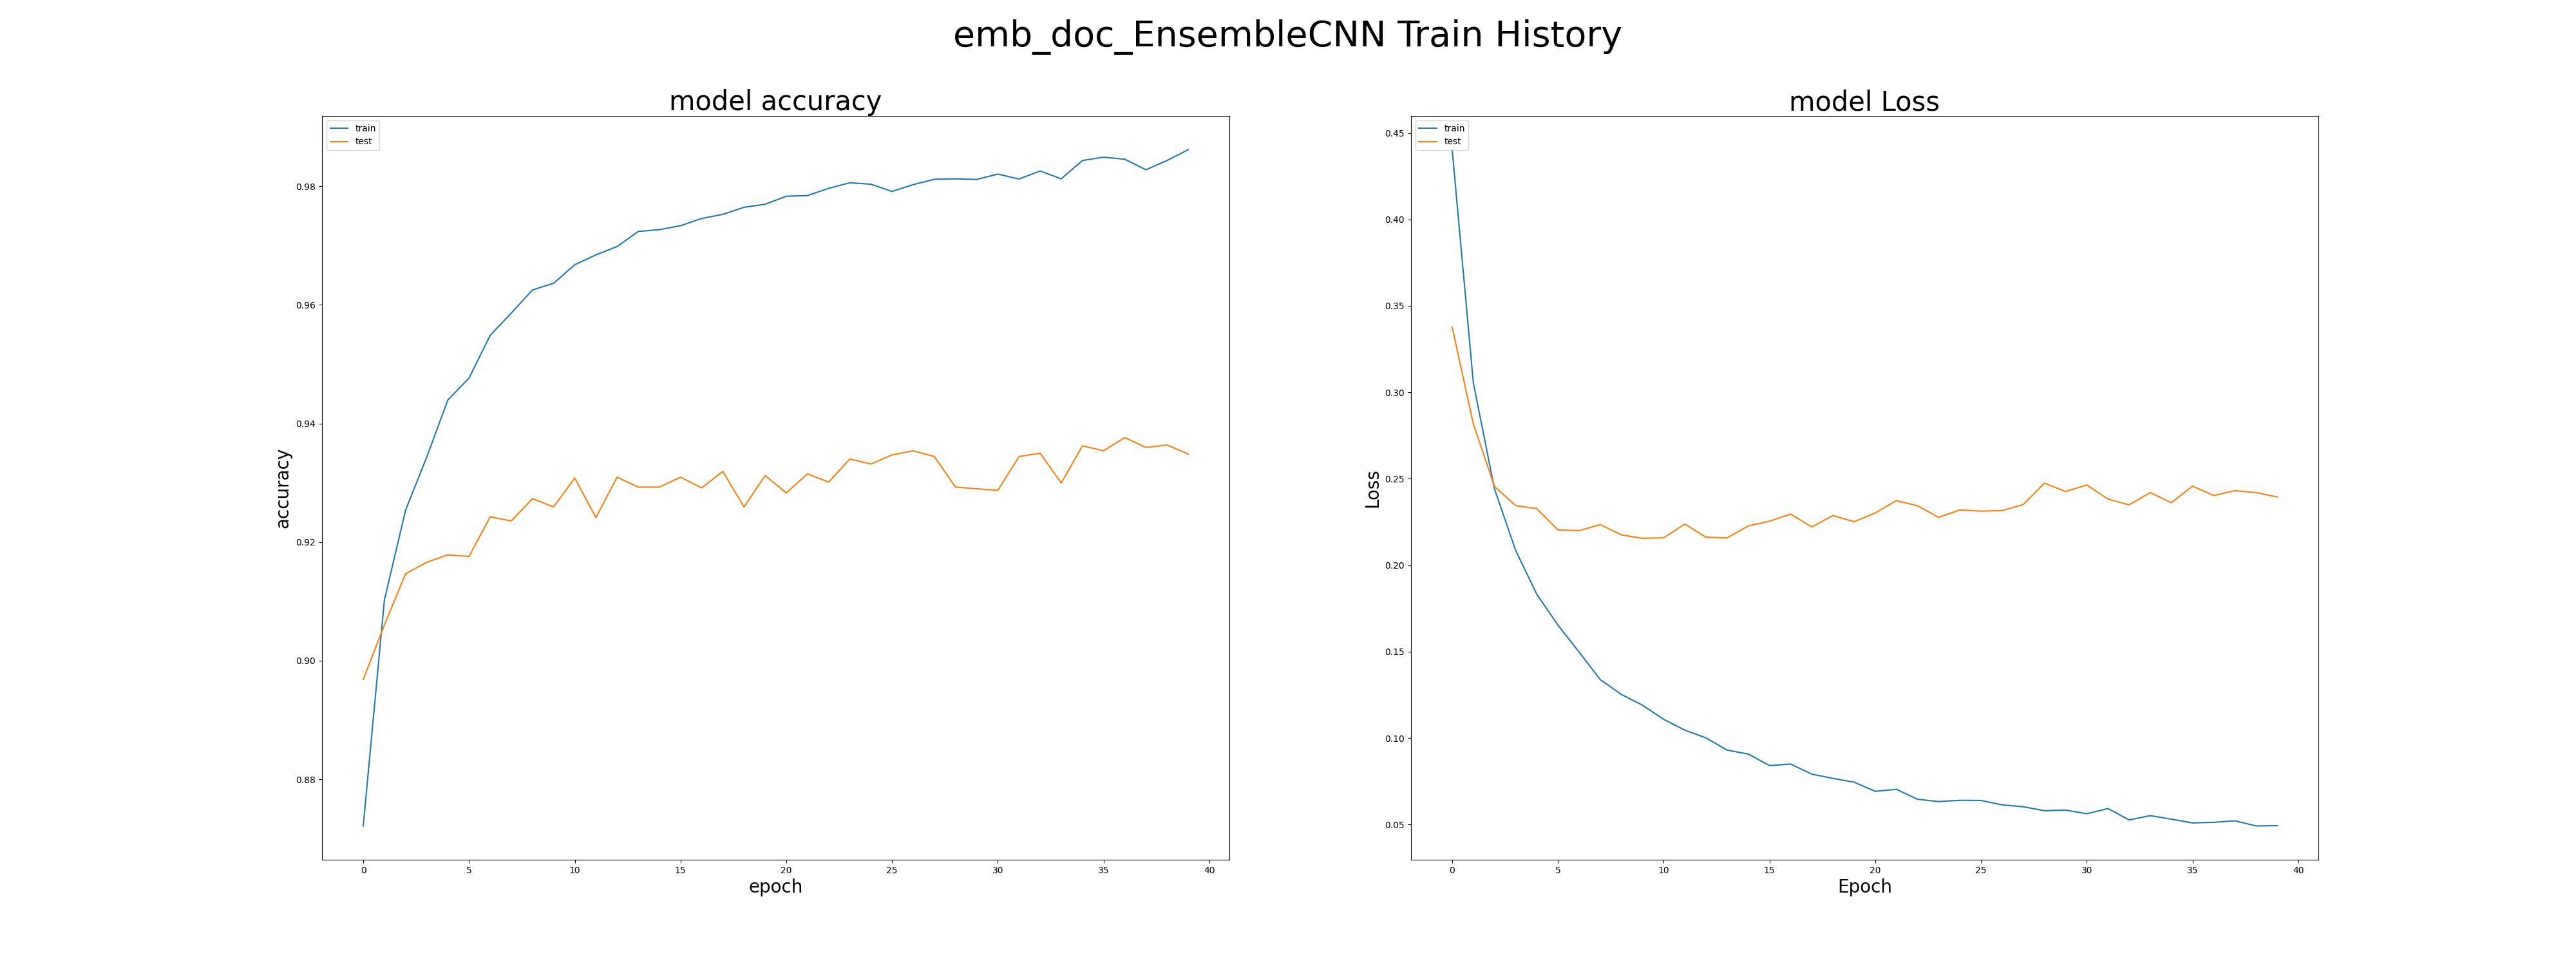

In [20]:
#print train history
display_img('emb_doc_EnsembleCNN.png')

##### Simple Dense

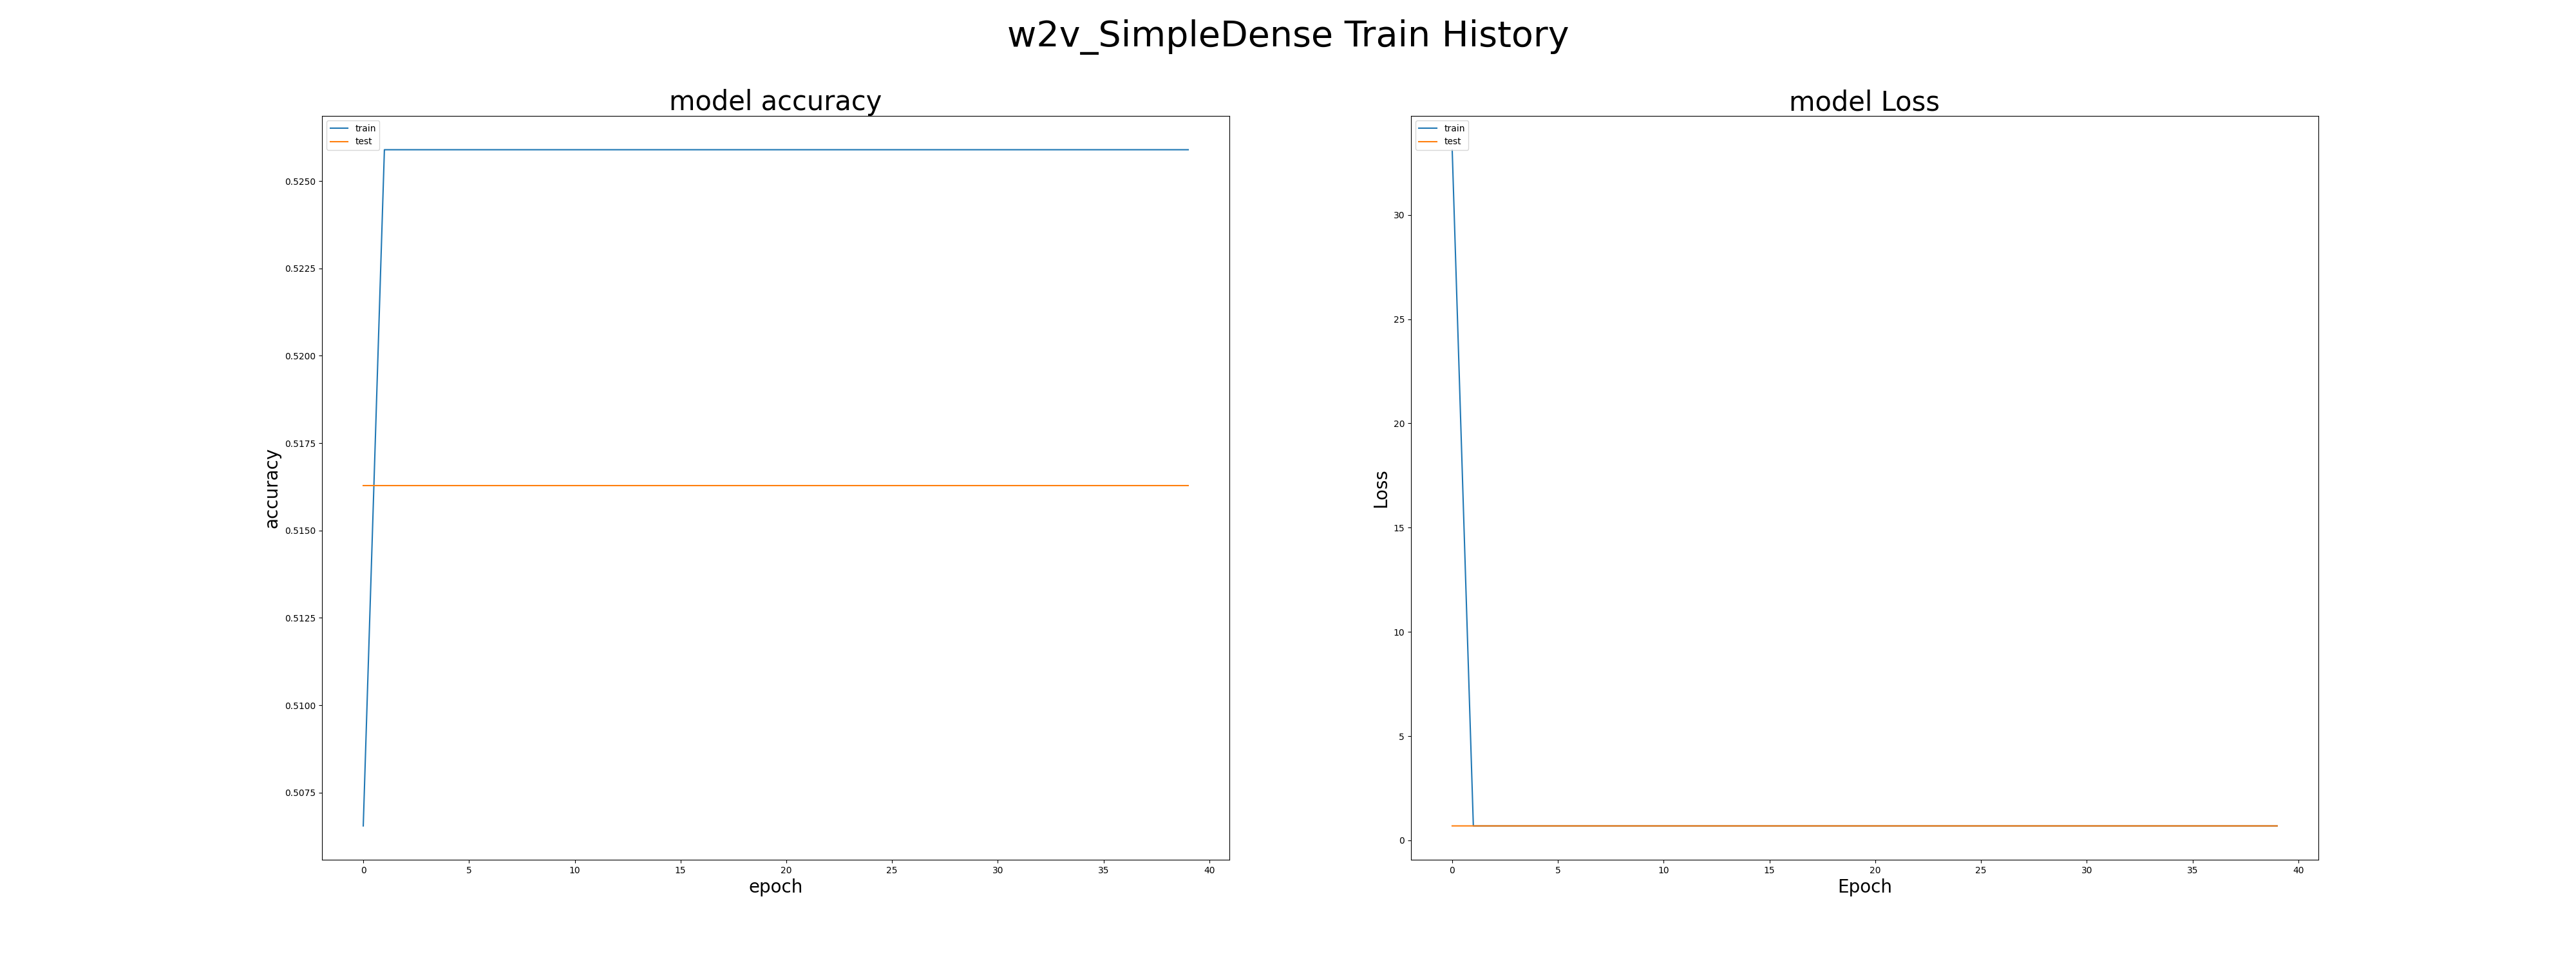

In [21]:
#print train history
display_img('w2v_SimpleDense.png')

#### TCN

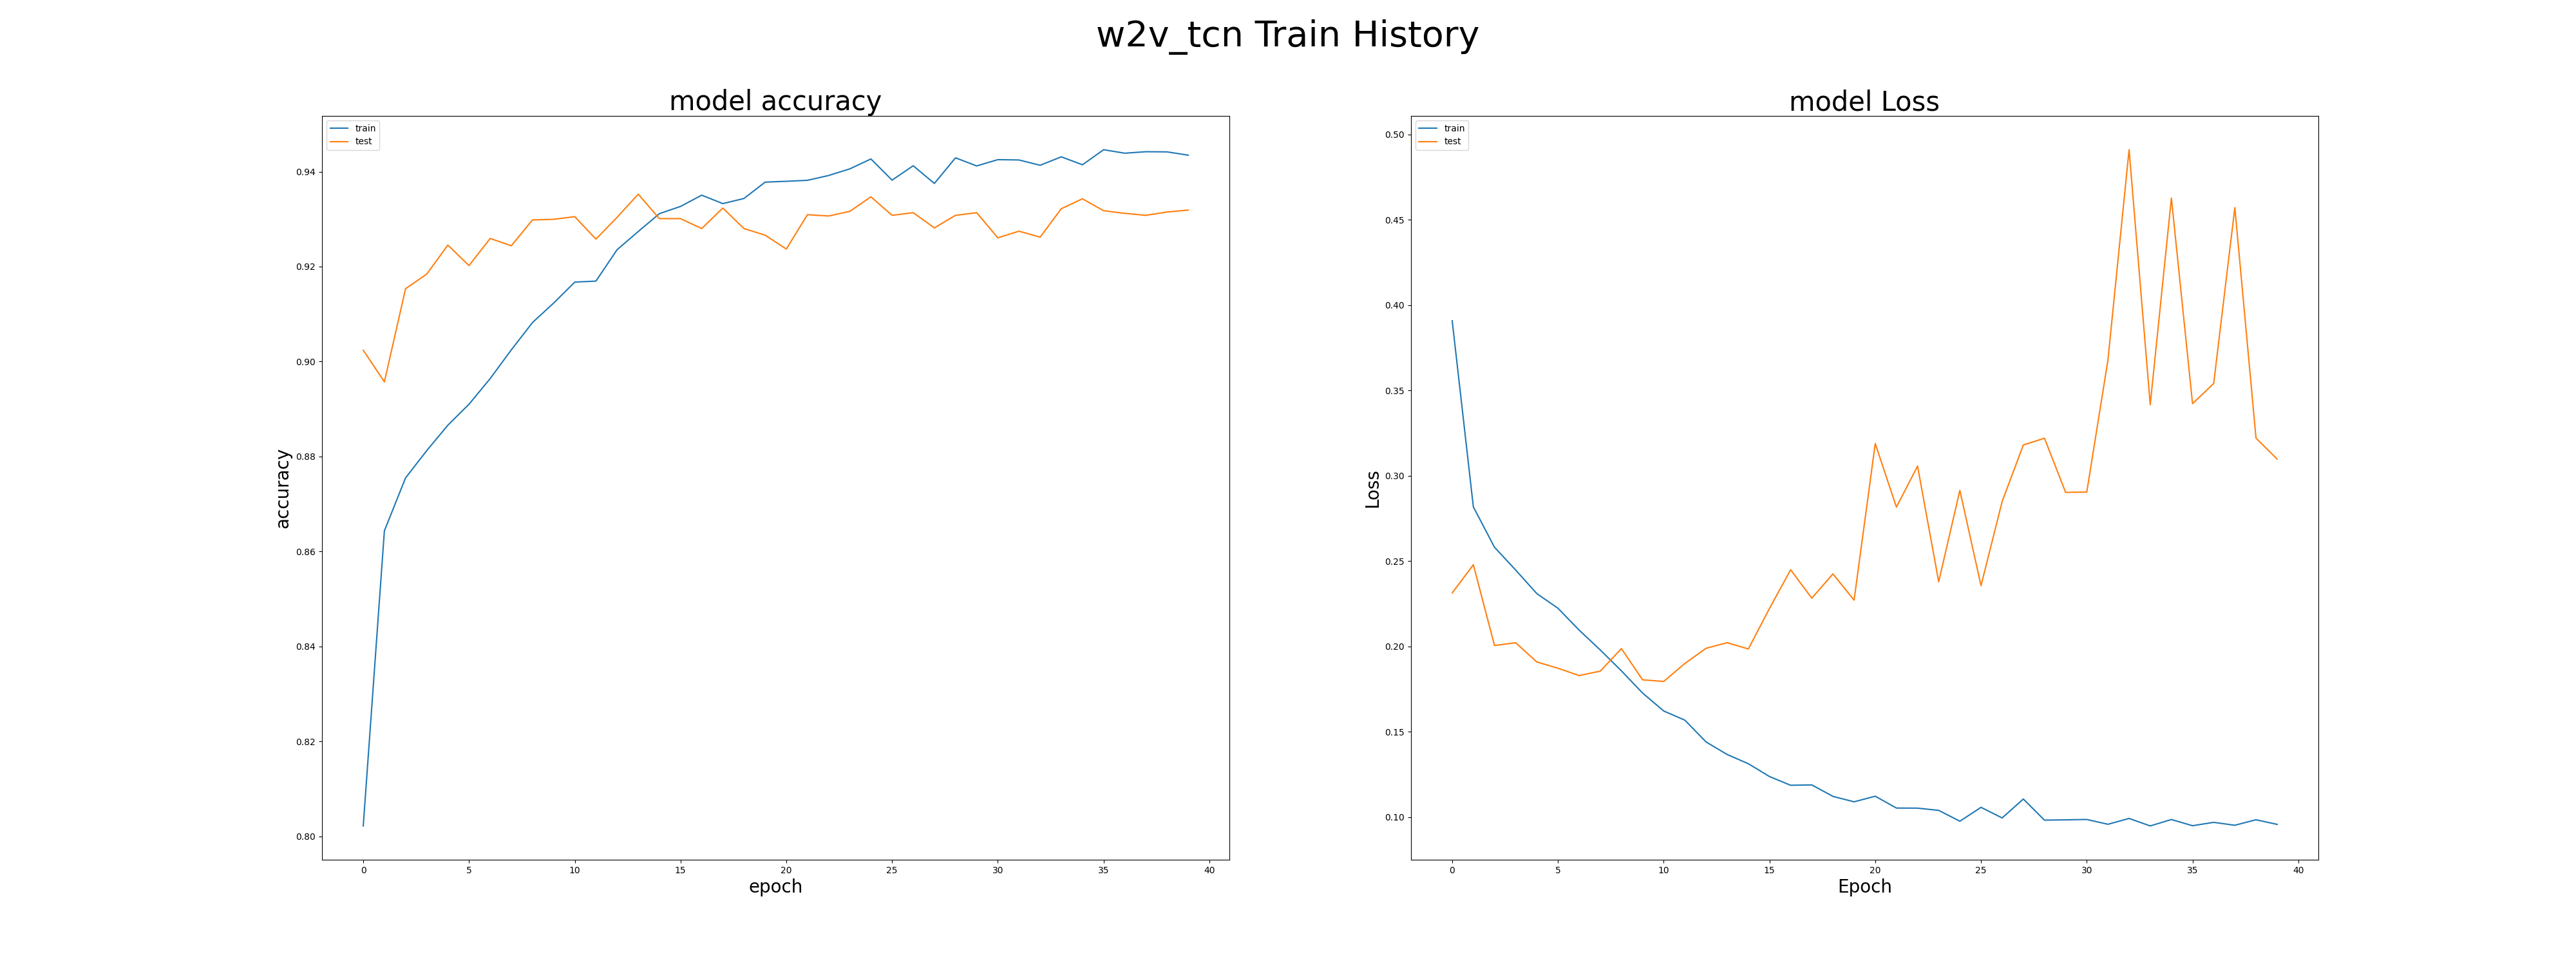

In [22]:

#print train history
display_img('w2v_tcn.png')

##### CNN1D

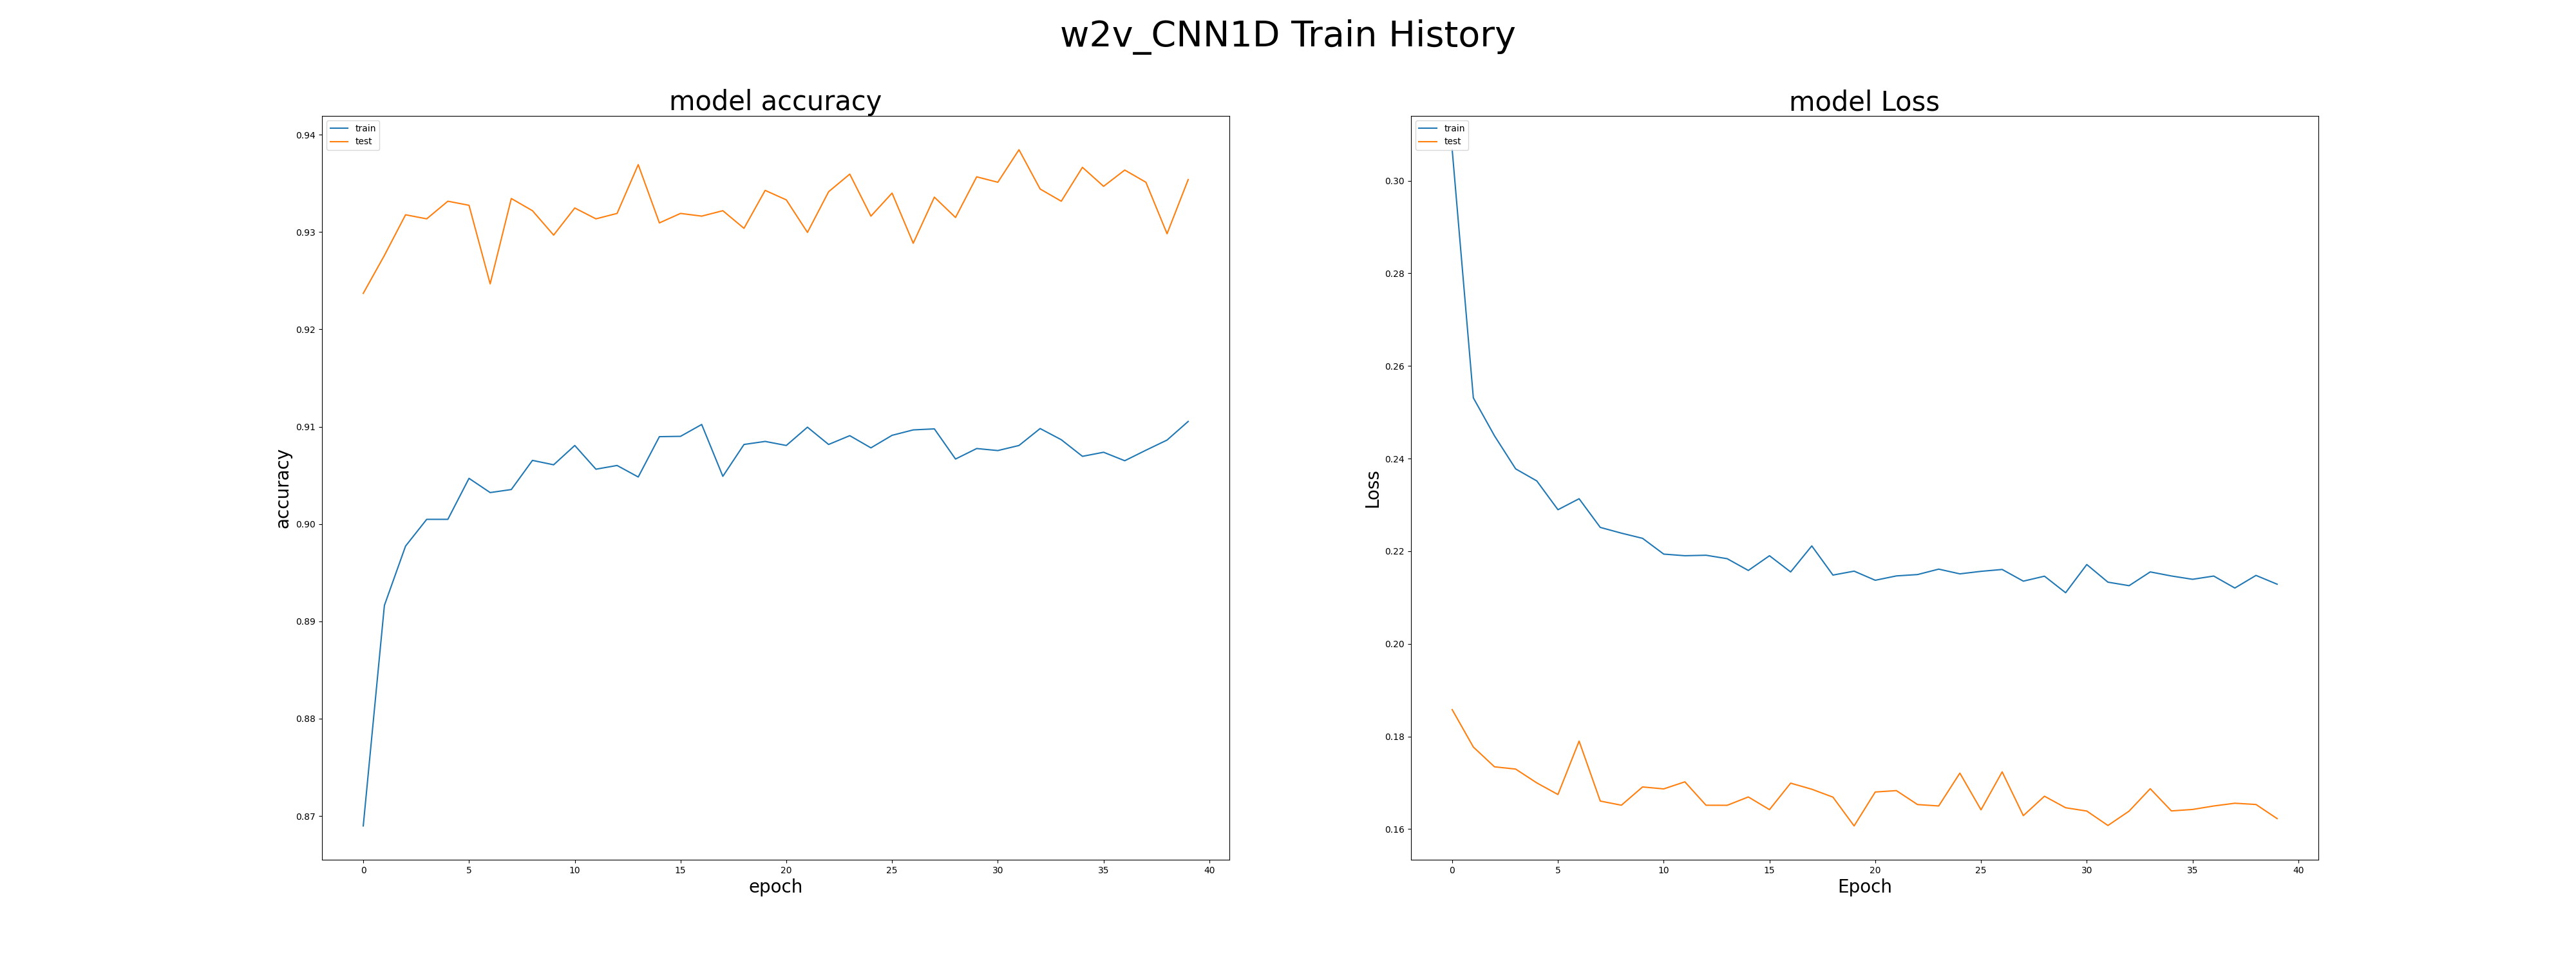

In [23]:

#print train history
display_img('w2v_CNN1D.png')

##### EnsembleCNNBiGRU

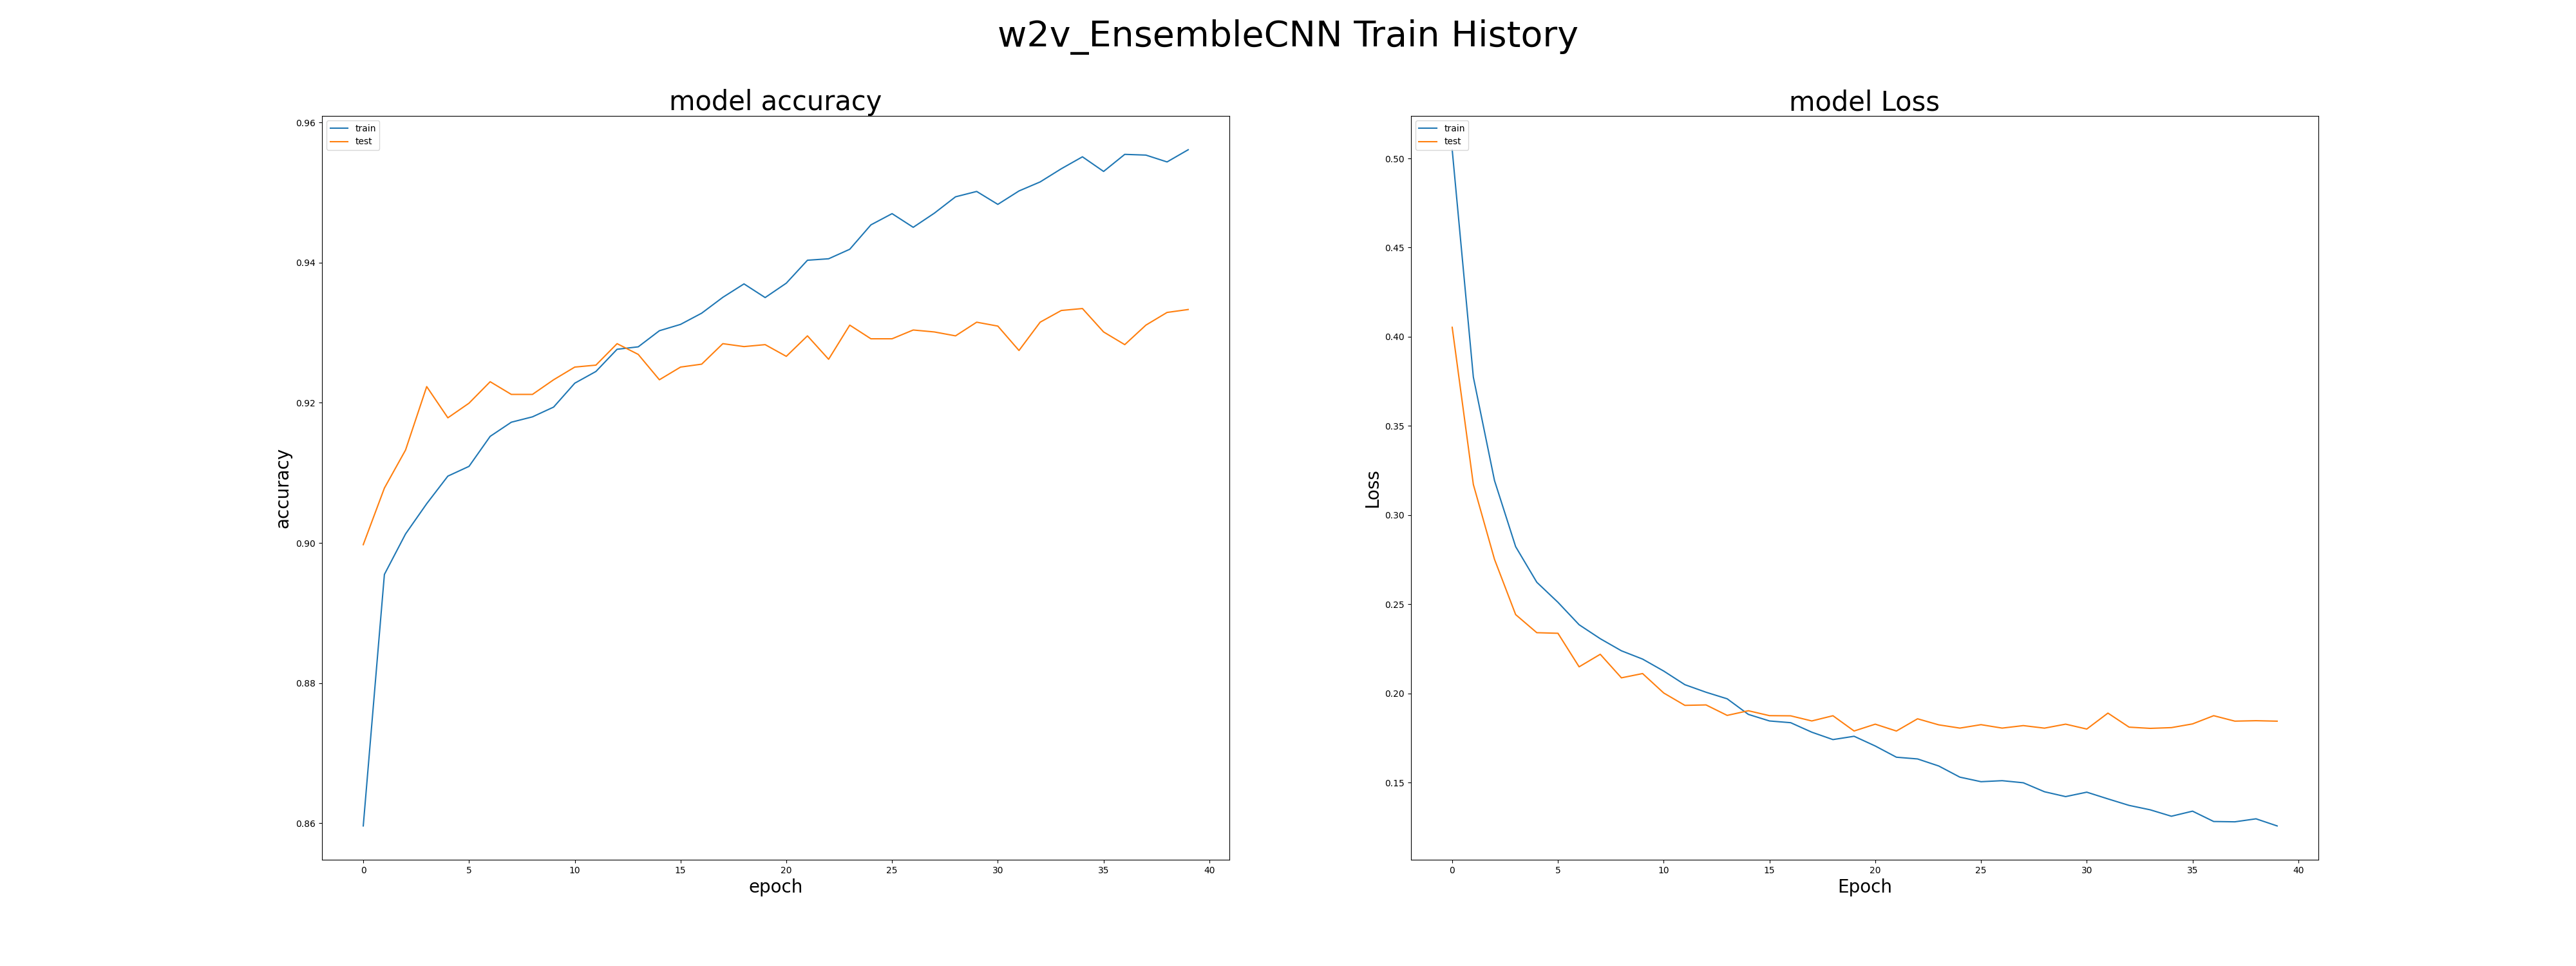

In [24]:
#print train history
display_img('w2v_EnsembleCNN.png')

### Resumo

In [29]:
sim_metrics = pd.DataFrame(jsonHandler.read_json(MODELS_PATH + '/sim_metrics.json'))
sim_metrics

,mean_accuracy,mean_loss,mean_val_accuracy,mean_val_loss
emb_doc_EmbeddingLSTM,0.979511,0.052351,0.923430,0.437689
emb_doc_SimpleDense,0.611886,0.627741,0.610993,0.630296
emb_doc_TCN,0.984794,0.040791,0.928700,0.445490
emb_doc_CNN1D,0.951094,0.110870,0.930820,0.251794
emb_doc_EnsembleCNN,0.968352,0.103374,0.928209,0.235296
w2v_EmbeddingLSTM,0.953158,0.117953,0.922243,0.238340
w2v_SimpleDense,0.525414,1.502788,0.516291,0.692801
w2v_tcn,0.923502,0.142806,0.927283,0.269137
w2v_CNN1D,0.905636,0.221868,0.932554,0.167656
w2v_EnsembleCNN,0.933326,0.192281,0.925985,0.202753


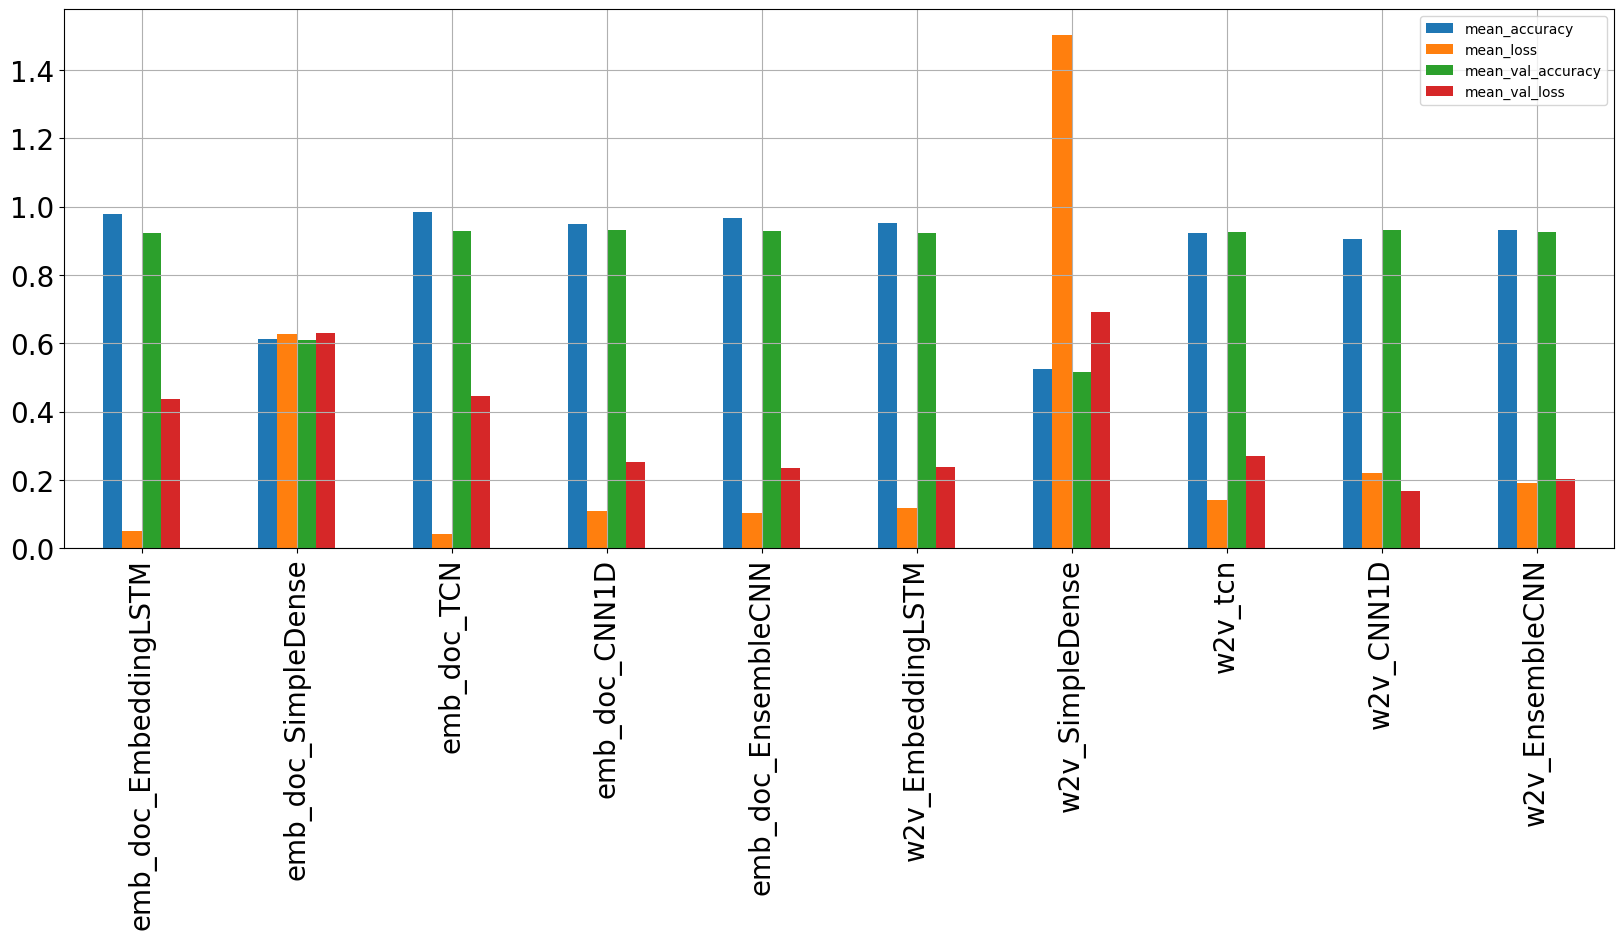

In [54]:
plt.style.use('default')
ax = sim_metrics.plot(kind='bar',figsize=(20,7))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid('on')
ax.set_facecolor('white')

O melhor modelo foi o w2v_EnsembleCNN